In [1]:
import numpy as np
from numba import jit
import matplotlib.pyplot as plt
import time
import ctypes
import os

MAX_DIMENSIONS = 2
MAX_ITER = 500
times = []
POP_SIZE = 50

TESTS_AMOUNT = 10
times_py = []

# Реализация на Python с использованием Numba

In [2]:
@jit(nopython=True)
def de_optimizer(objective_function, bounds, pop_size=POP_SIZE, max_iter=MAX_ITER, F=0.8, CR=0.9):
    """
    Differential Evolution optimizer
    """
    n_dims = len(bounds)
    # Initialize population
    population = np.zeros((pop_size, n_dims))
    for i in range(pop_size):
        for j in range(n_dims):
            population[i, j] = bounds[j, 0] + np.random.rand()*(bounds[j, 1] - bounds[j, 0])
    # Evaluate initial population
    scores = np.zeros(pop_size)
    for i in range(pop_size):
        scores[i] = objective_function(population[i])
    # Find best individual in initial population
    best_idx = np.argmin(scores)
    best = population[best_idx]

    # Initialize performance graph data
    performance = []

    # Main loop
    for i in range(max_iter):
        # Generate new population
        v = rand_1_bin(population, F, CR)
        # Evaluate new population
        new_scores = np.zeros(pop_size)
        for j in range(pop_size):
            new_scores[j] = objective_function(v[j])
        # Replace old population with new population if better
        for j in range(pop_size):
            if new_scores[j] < scores[j]:
                population[j] = v[j]
                scores[j] = new_scores[j]
        # Update best individual
        new_best_idx = np.argmin(scores)
        if scores[new_best_idx] < scores[best_idx]:
            best_idx = new_best_idx
            best = population[best_idx]

        # Record the best score in this iteration for performance graph
        performance.append(scores[best_idx])

    return best, scores[best_idx], performance

In [3]:
@jit(nopython=True)
def rand_1_bin(population, F, CR):
    """
    rand/1/bin DE variant
    """
    n = population.shape[0]
    D = population.shape[1]
    v = np.zeros((n, D))
    for i in range(n):
        # Select three different individuals at random
        idxs = np.random.choice(n, 3, replace=False)
        a, b, c = population[idxs]
        # Generate mutant vector
        mutant = a + F*(b - c)
        # Generate trial vector
        jrand = np.random.randint(D)
        trial = np.zeros(D)
        # Select trial vector between mutant or just from population
        for j in range(D):
            if np.random.rand() < CR or j == jrand:
                trial[j] = mutant[j]
            else:
                trial[j] = population[i, j]
        v[i] = trial
    return v

In [4]:
# Add a performance function to calculate and return the time taken for optimization
def performance_function(func, *args, **kwargs):
    start_time = time.perf_counter()
    result = func(*args, **kwargs)
    end_time = time.perf_counter()
    elapsed_time = end_time - start_time
    return result, elapsed_time

In [5]:
def plot_performance(performance):
    plt.plot(performance)
    plt.xlabel("Iterations")
    plt.ylabel("Best score")
    plt.show()

In [6]:
def draw_distribution_graphic(best_values, tests_number, function_name):
    x = np.array([i for i in range(1, tests_number + 1)])
    plt.title("Distribution of " + function_name)
    plt.xlabel("Test number")
    plt.ylabel("Best found value")
    plt.scatter(x, best_values, c="blue")
    average = np.average(best_values)
    dispersion = np.sqrt(np.var(best_values))
    average_list = [average for i in range(1, tests_number + 1)]
    plt.plot(x, average_list, c="red")
    plt.fill_between(x, average_list - dispersion, average_list + dispersion, color="red", alpha=0.2)
    plt.show()

# Функции для тестирования

In [7]:
@jit(nopython=True)
def rosenbrock_function(x):
    return np.sum(100.0 * (x[1:] - x[:-1]**2.0)**2.0 + (1 - x[:-1])**2.0)

Optimizing Rosenbrock function
dimensions number: 2
population size: 50
generations number: 500
#1 Best solution: [1. 1.], Best score: 0.00000, Time taken: 3.68724 seconds


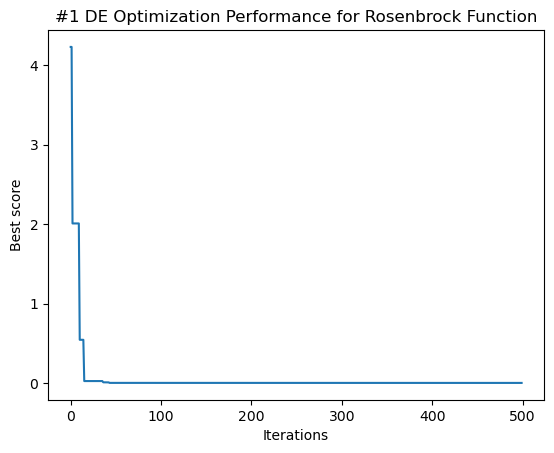

#2 Best solution: [1. 1.], Best score: 0.00000, Time taken: 0.03912 seconds


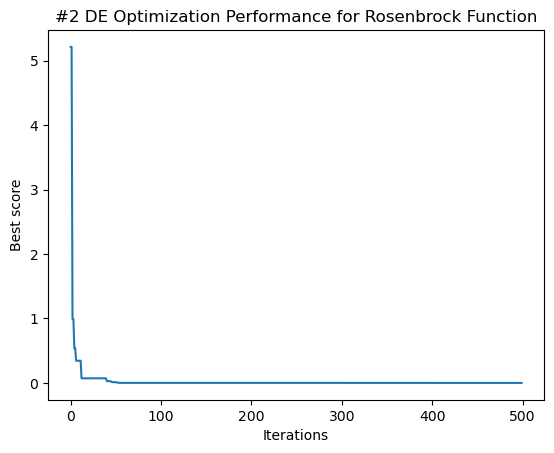

#3 Best solution: [1. 1.], Best score: 0.00000, Time taken: 0.03658 seconds


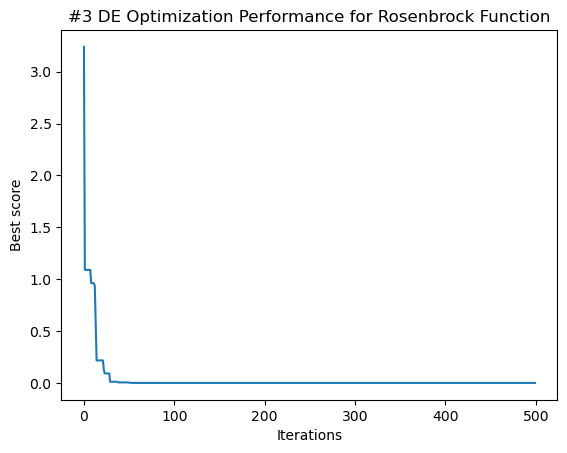

#4 Best solution: [1. 1.], Best score: 0.00000, Time taken: 0.03022 seconds


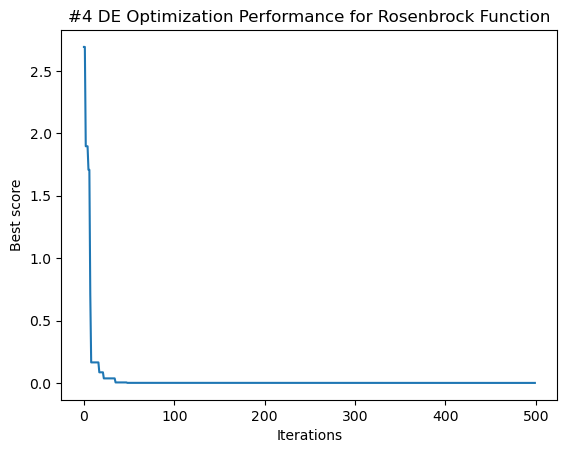

#5 Best solution: [1. 1.], Best score: 0.00000, Time taken: 0.05363 seconds


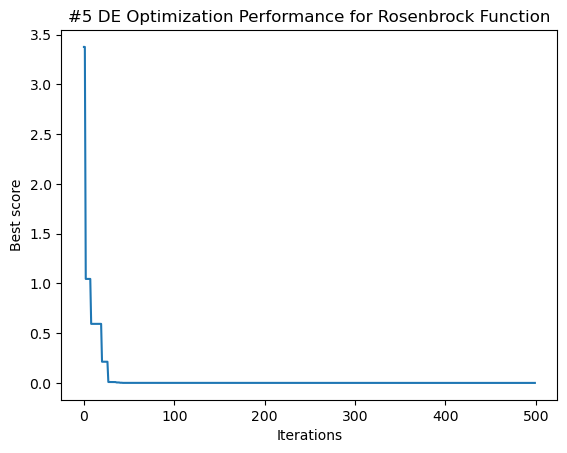

#6 Best solution: [1. 1.], Best score: 0.00000, Time taken: 0.03298 seconds


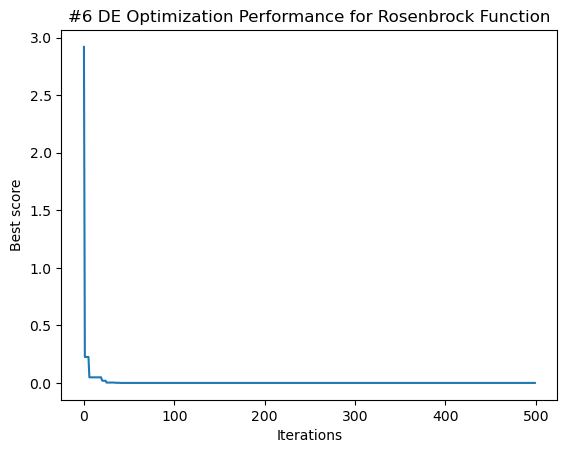

#7 Best solution: [1. 1.], Best score: 0.00000, Time taken: 0.04033 seconds


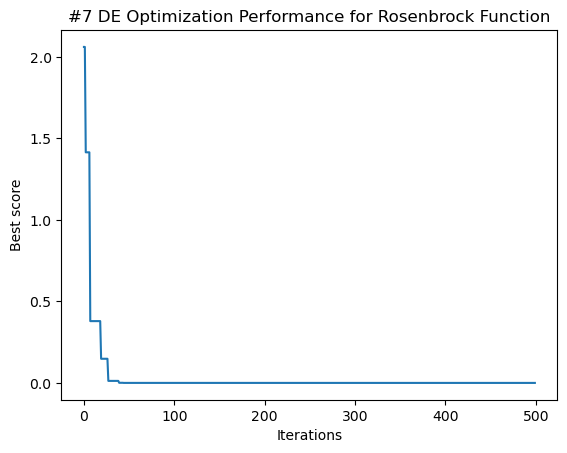

#8 Best solution: [1. 1.], Best score: 0.00000, Time taken: 0.03213 seconds


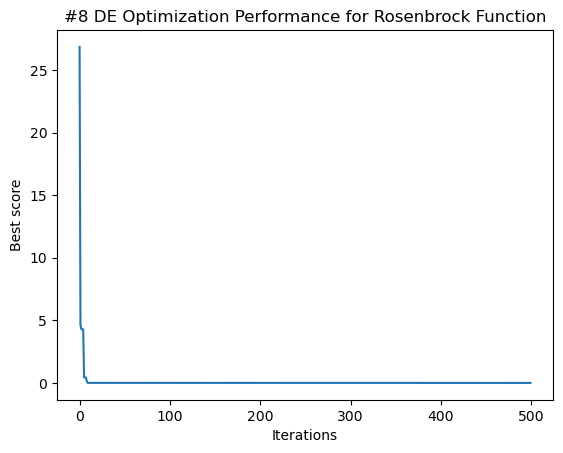

#9 Best solution: [1. 1.], Best score: 0.00000, Time taken: 0.03831 seconds


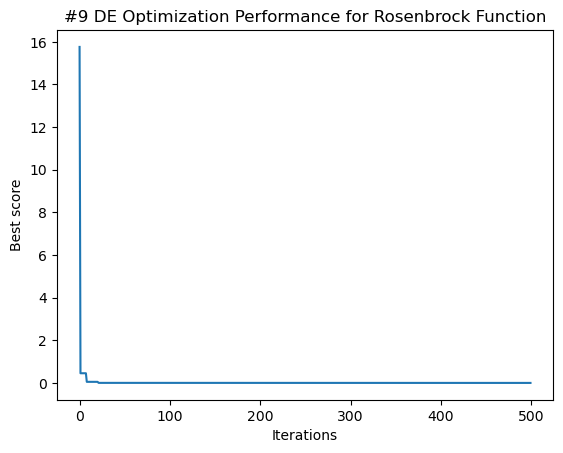

#10 Best solution: [1. 1.], Best score: 0.00000, Time taken: 0.03866 seconds


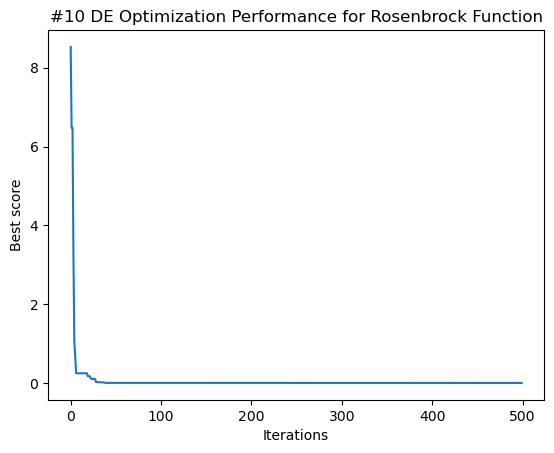

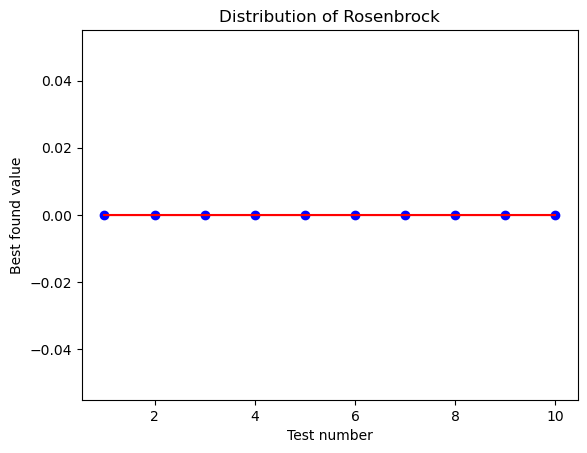

Dispersion is 0.0


In [8]:
# Optimize Rosenbrock function
print("Optimizing Rosenbrock function")
bounds = np.array([[-5, 5], [-5, 5]])
print(f"dimensions number: {len(bounds)}")
print(f"population size: {POP_SIZE}")
print(f"generations number: {MAX_ITER}")
best_values = []
time_average = 0.0
for i in range(TESTS_AMOUNT):
    (best_solution, best_score, performance), elapsed_time = performance_function(de_optimizer, rosenbrock_function, bounds)
    print(f"#{i + 1} Best solution: {best_solution}, Best score: {best_score:.5f}, Time taken: {elapsed_time:.5f} seconds")
    plt.figure()
    plt.title(f"#{i + 1} DE Optimization Performance for Rosenbrock Function")
    plot_performance(performance)
    best_values.append(best_score)
    time_average += elapsed_time
times_py.append(time_average / TESTS_AMOUNT)
draw_distribution_graphic(best_values, TESTS_AMOUNT, "Rosenbrock")
print("Dispersion is " + str(np.var(best_values)))

In [9]:
@jit(nopython=True)
def de_jong_function(x):
    return np.sum(x**2)

Optimizing De Jong (Sphere) function
dimensions number: 2
population size: 50
generations number: 500
#1 Best solution: [-6.29057113e-41  6.13944418e-40], Best score: 0.00000, Time taken: 1.05964 seconds


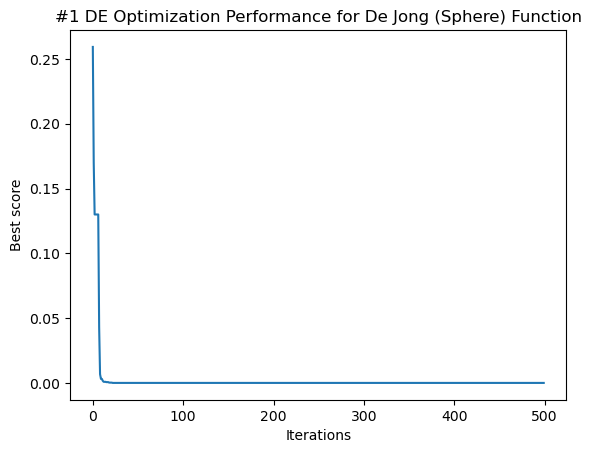

#2 Best solution: [2.12686190e-40 2.32484008e-40], Best score: 0.00000, Time taken: 0.03598 seconds


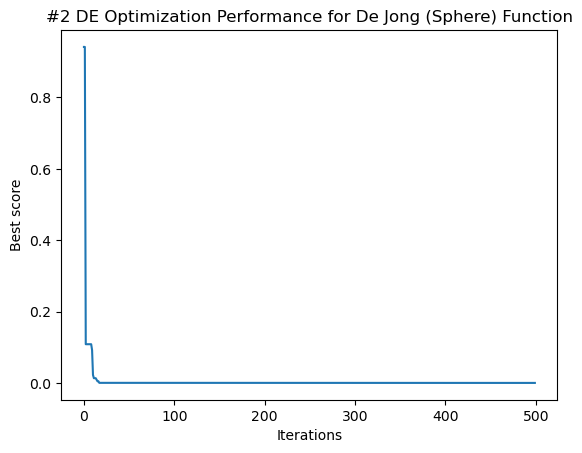

#3 Best solution: [1.44159461e-40 2.58777915e-40], Best score: 0.00000, Time taken: 0.03053 seconds


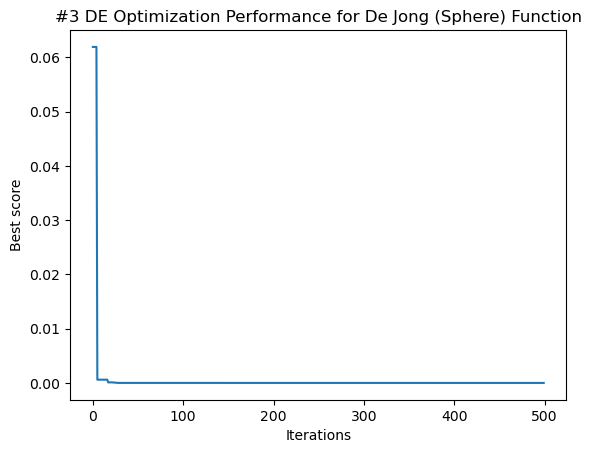

#4 Best solution: [3.80274714e-41 1.11908301e-41], Best score: 0.00000, Time taken: 0.03560 seconds


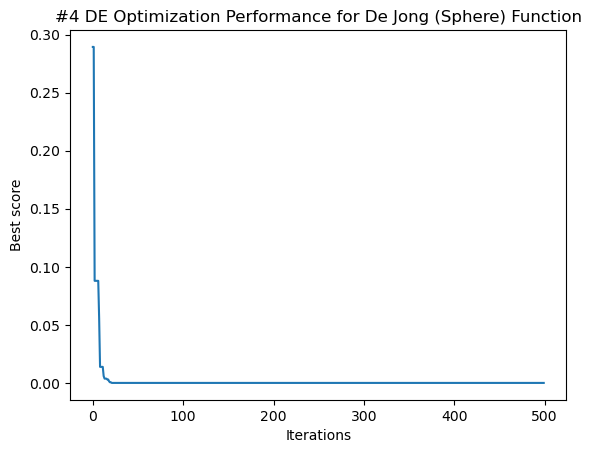

#5 Best solution: [ 1.09710111e-39 -5.92391284e-40], Best score: 0.00000, Time taken: 0.04060 seconds


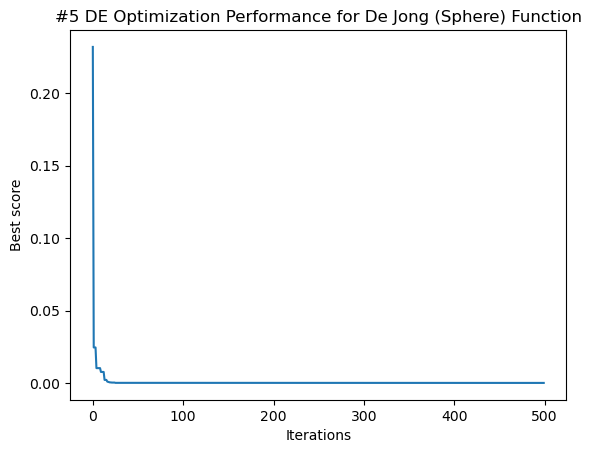

#6 Best solution: [ 4.71742774e-41 -3.08932380e-40], Best score: 0.00000, Time taken: 0.03209 seconds


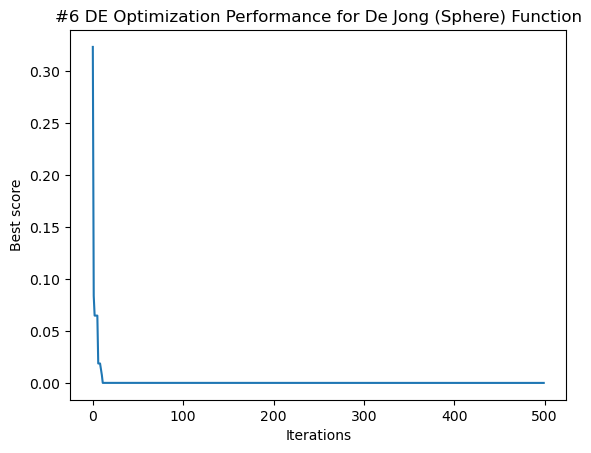

#7 Best solution: [-2.60111445e-40 -7.43314956e-41], Best score: 0.00000, Time taken: 0.03933 seconds


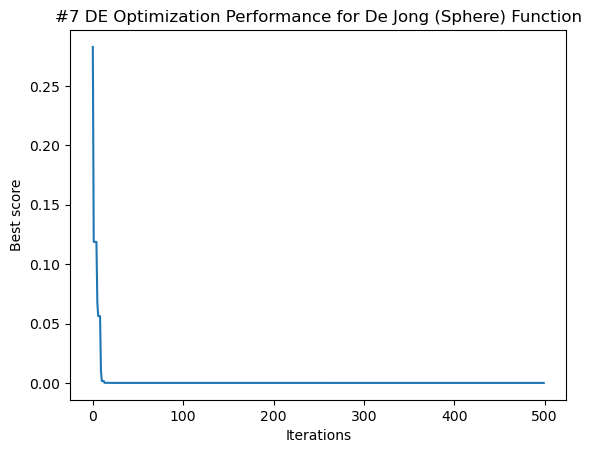

#8 Best solution: [-2.93664391e-41  1.68960995e-40], Best score: 0.00000, Time taken: 0.02886 seconds


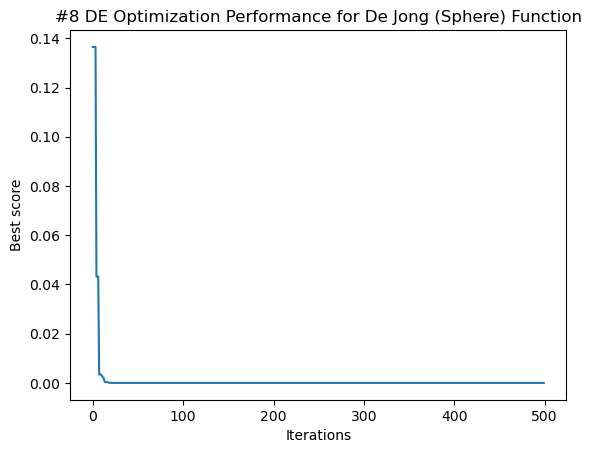

#9 Best solution: [ 2.57560933e-39 -1.50719185e-39], Best score: 0.00000, Time taken: 0.02892 seconds


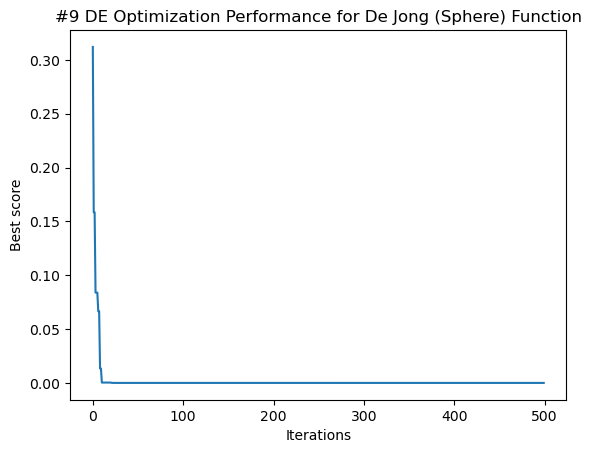

#10 Best solution: [3.53916927e-40 4.02198791e-41], Best score: 0.00000, Time taken: 0.02883 seconds


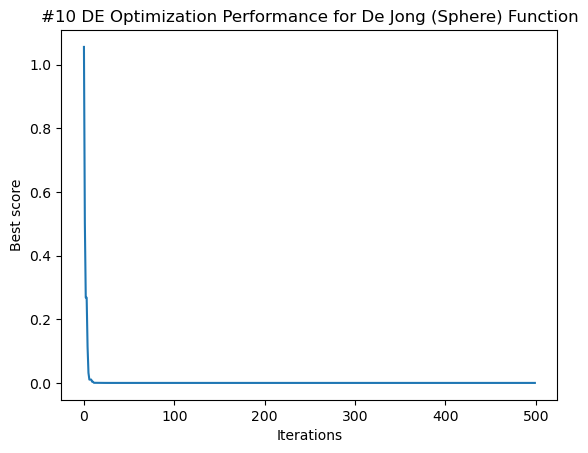

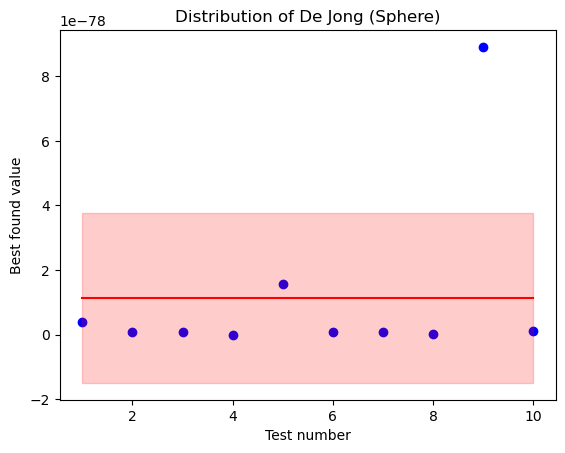

Dispersion is 6.901995554458894e-156


In [10]:
# Optimize De Jong (Sphere) function
print("Optimizing De Jong (Sphere) function")
bounds = np.array([[-5, 5], [-5, 5]])
print(f"dimensions number: {len(bounds)}")
print(f"population size: {POP_SIZE}")
print(f"generations number: {MAX_ITER}")
best_values = []
time_average = 0.0
for i in range(TESTS_AMOUNT):
    (best_solution, best_score, performance), elapsed_time = performance_function(de_optimizer, de_jong_function, bounds)
    print(f"#{i + 1} Best solution: {best_solution}, Best score: {best_score:.5f}, Time taken: {elapsed_time:.5f} seconds")
    plt.figure()
    plt.title(f"#{i + 1} DE Optimization Performance for De Jong (Sphere) Function")
    plot_performance(performance)
    best_values.append(best_score)
    time_average += elapsed_time
times_py.append(time_average / TESTS_AMOUNT)
draw_distribution_graphic(best_values, TESTS_AMOUNT, "De Jong (Sphere)")
print("Dispersion is " + str(np.var(best_values)))

In [11]:
@jit(nopython=True)
def schwefel_function(x_ptr):
    x = np.clip(x_ptr, -500.0, 500.0)
    return np.sum(x * np.sin(np.sqrt(np.abs(x))))

Optimizing Schwefel function
dimensions number: 2
population size: 50
generations number: 500
#1 Best solution: [-420.96874604 -420.96874626], Best score: -837.96577, Time taken: 1.21909 seconds


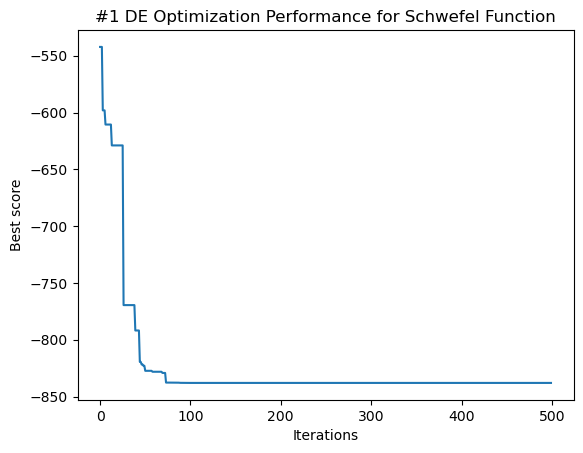

#2 Best solution: [-420.96874637 -420.96874589], Best score: -837.96577, Time taken: 0.03661 seconds


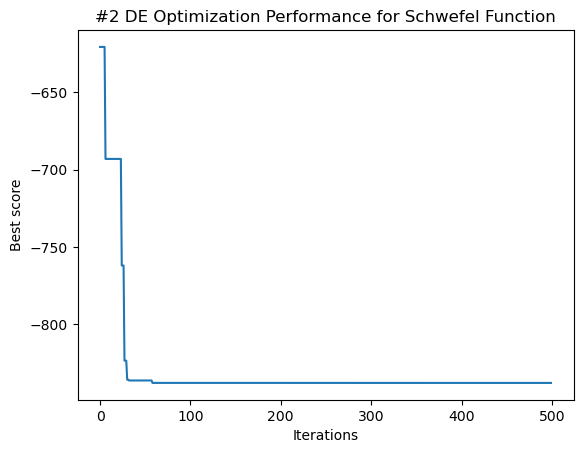

#3 Best solution: [-420.96874645 -420.96874627], Best score: -837.96577, Time taken: 0.03245 seconds


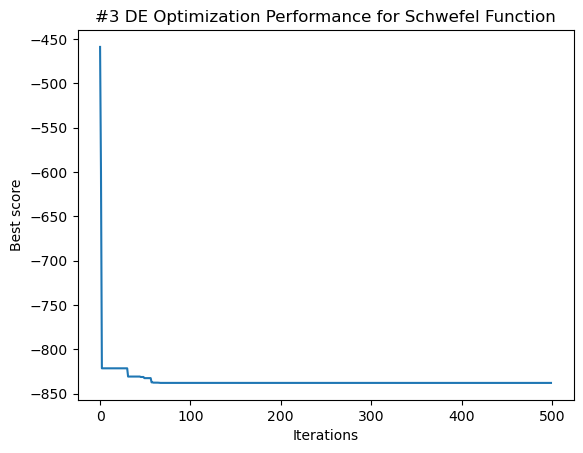

#4 Best solution: [-420.96874629 -420.96874667], Best score: -837.96577, Time taken: 0.03656 seconds


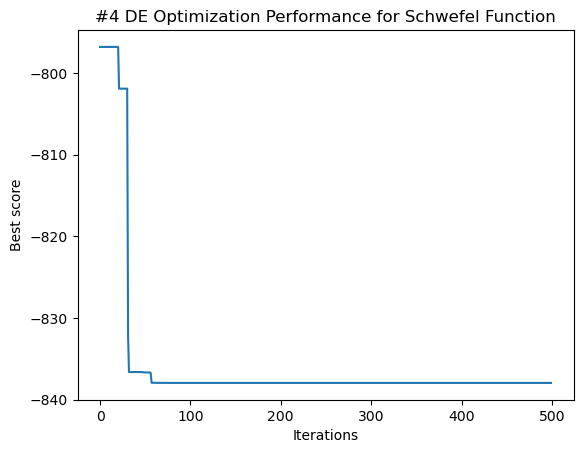

#5 Best solution: [-420.96874645 -420.968746  ], Best score: -837.96577, Time taken: 0.03236 seconds


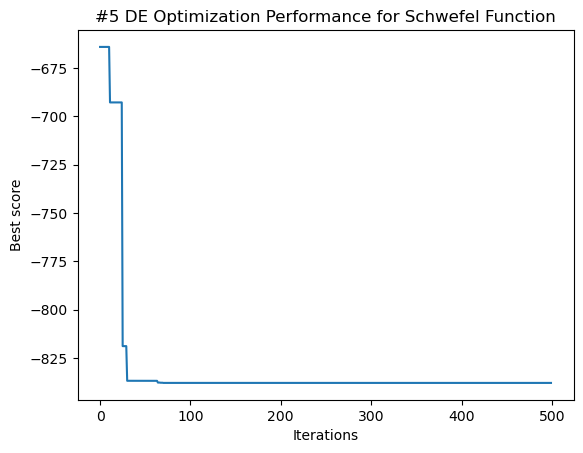

#6 Best solution: [-420.96874638 -420.96874645], Best score: -837.96577, Time taken: 0.03362 seconds


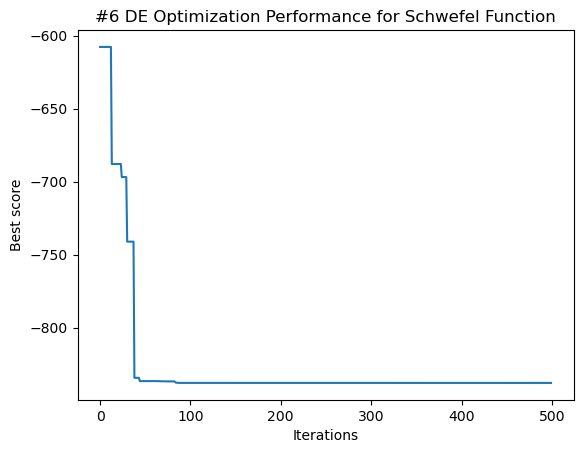

#7 Best solution: [-420.96874671 -420.96874672], Best score: -837.96577, Time taken: 0.03405 seconds


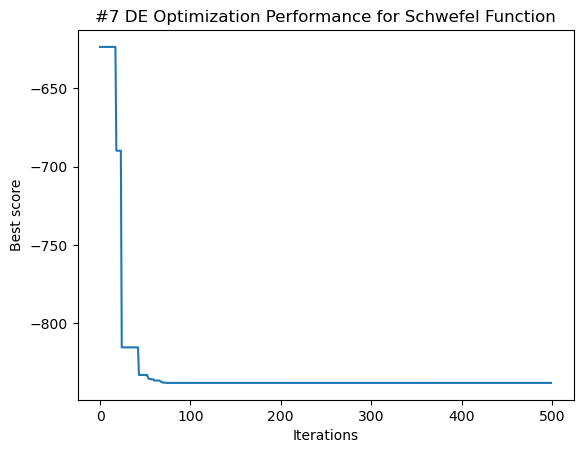

#8 Best solution: [-420.96874619 -420.96874605], Best score: -837.96577, Time taken: 0.03165 seconds


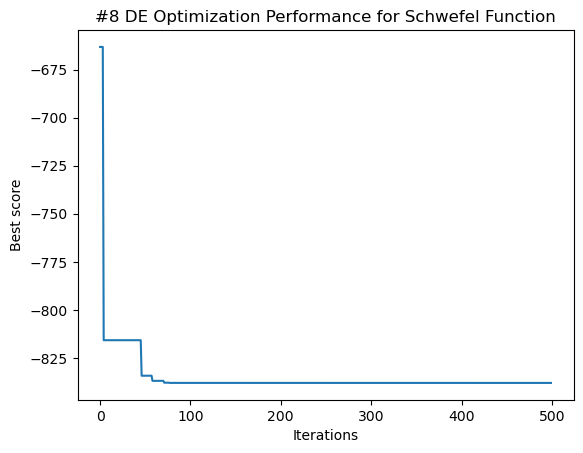

#9 Best solution: [-420.96874631 -420.96874651], Best score: -837.96577, Time taken: 0.03199 seconds


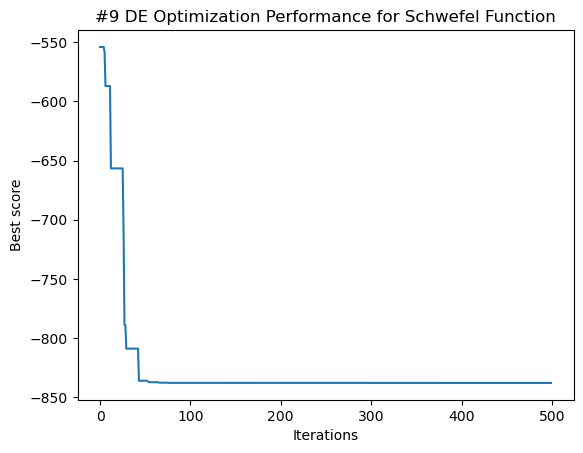

#10 Best solution: [-420.96874641 -420.96874611], Best score: -837.96577, Time taken: 0.03196 seconds


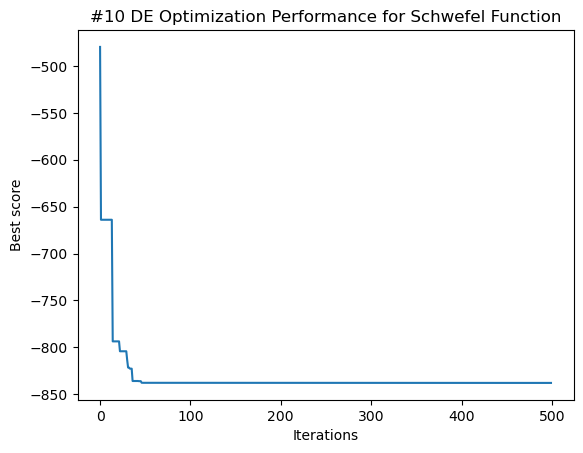

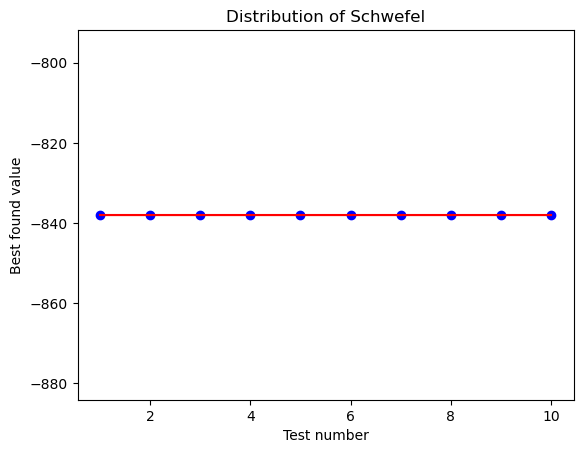

Dispersion is 0.0


In [12]:
# Optimize Schwefel function
print("Optimizing Schwefel function")
bounds = np.array([[-500, 500], [-500, 500]])
print(f"dimensions number: {len(bounds)}")
print(f"population size: {POP_SIZE}")
print(f"generations number: {MAX_ITER}")
best_values = []
time_average = 0.0
for i in range(TESTS_AMOUNT):
    (best_solution, best_score, performance), elapsed_time = performance_function(de_optimizer, schwefel_function, bounds)
    print(f"#{i + 1} Best solution: {best_solution}, Best score: {best_score:.5f}, Time taken: {elapsed_time:.5f} seconds")
    plt.figure()
    plt.title(f"#{i + 1} DE Optimization Performance for Schwefel Function")
    plot_performance(performance)
    best_values.append(best_score)
    time_average += elapsed_time
times_py.append(time_average / TESTS_AMOUNT)
draw_distribution_graphic(best_values, TESTS_AMOUNT, "Schwefel")
print("Dispersion is " + str(np.var(best_values)))

In [13]:
@jit(nopython=True)
def sum_of_different_powers_function(x):
    return np.sum(np.abs(x)**(np.arange(2, len(x) + 2)))

Optimizing Sum of different powers function
dimensions number: 2
population size: 50
generations number: 500
#1 Best solution: [-9.03618639e-49 -5.07862083e-32], Best score: 0.00000, Time taken: 1.28823 seconds


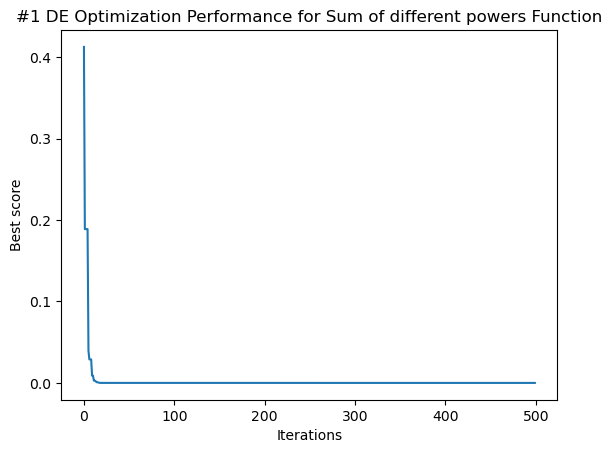

#2 Best solution: [-8.36998411e-48 -2.05234568e-32], Best score: 0.00000, Time taken: 0.04146 seconds


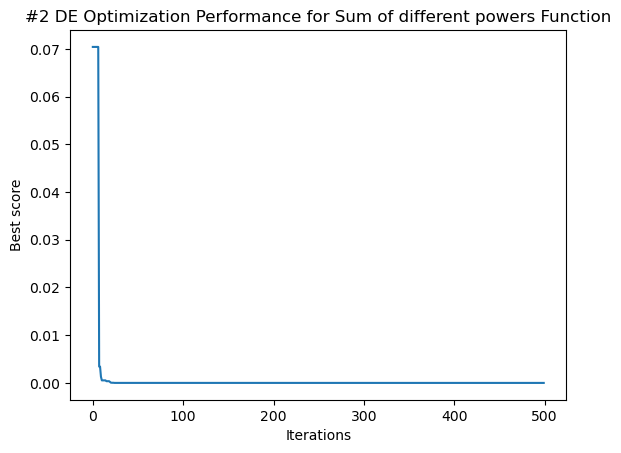

#3 Best solution: [-1.00464993e-46  1.98951457e-31], Best score: 0.00000, Time taken: 0.03236 seconds


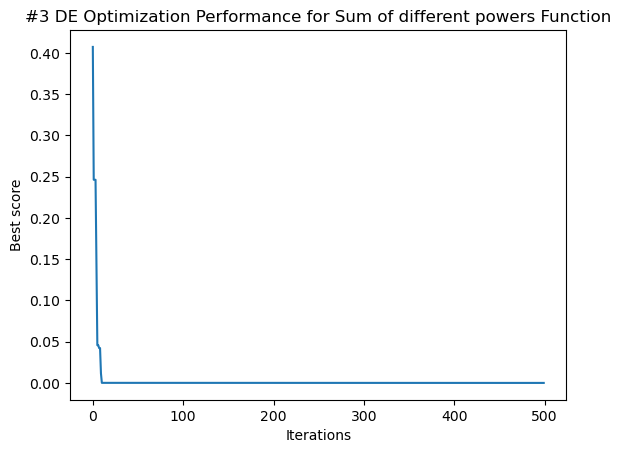

#4 Best solution: [ 1.11264292e-47 -7.64383333e-34], Best score: 0.00000, Time taken: 0.03248 seconds


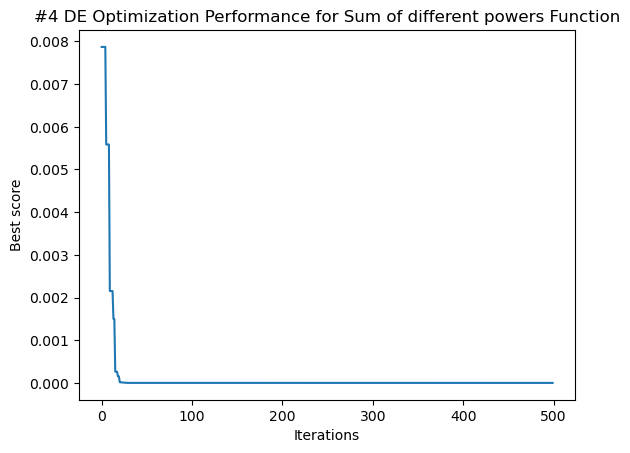

#5 Best solution: [5.00804524e-47 1.30017812e-31], Best score: 0.00000, Time taken: 0.03683 seconds


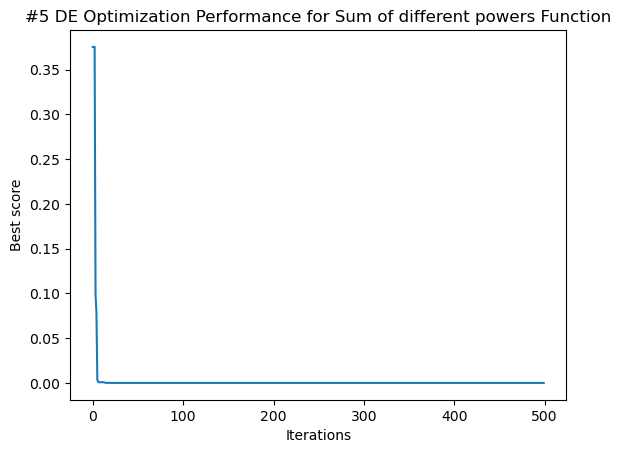

#6 Best solution: [-2.54318671e-49 -1.06055738e-32], Best score: 0.00000, Time taken: 0.03399 seconds


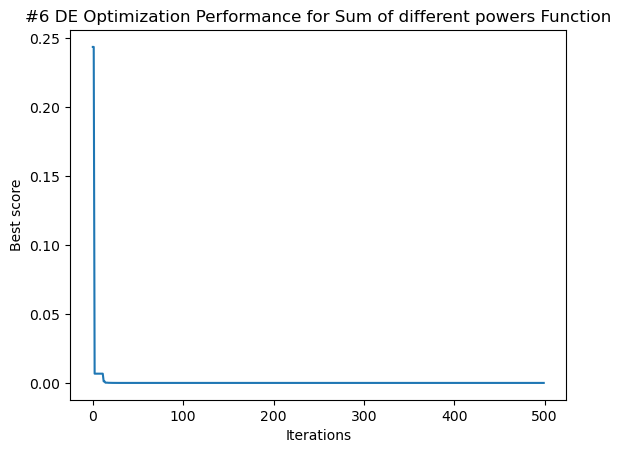

#7 Best solution: [ 4.83426357e-47 -6.68580594e-32], Best score: 0.00000, Time taken: 0.03377 seconds


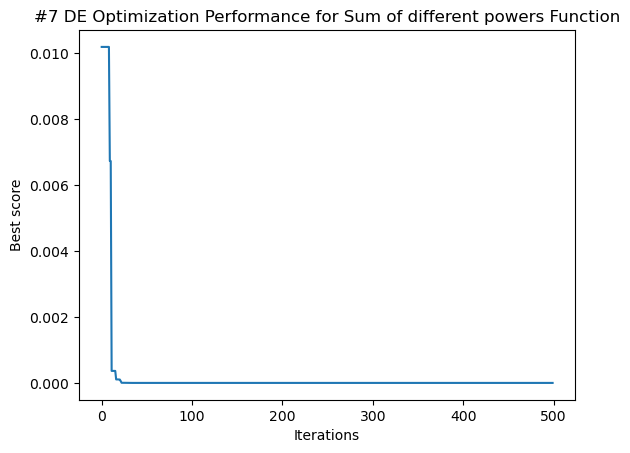

#8 Best solution: [-1.45613546e-46  8.40675309e-32], Best score: 0.00000, Time taken: 0.03206 seconds


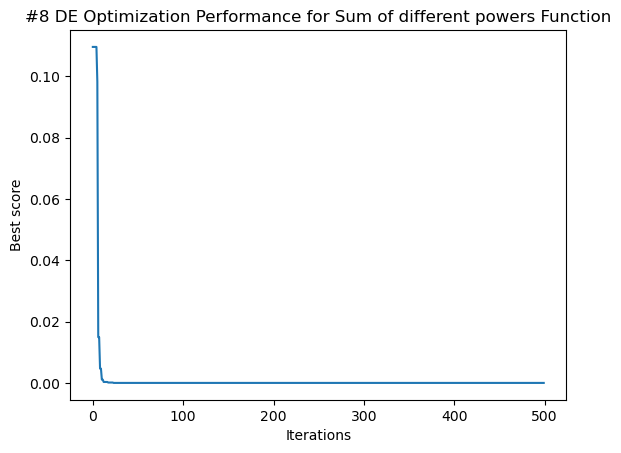

#9 Best solution: [-2.79023647e-46 -1.95803487e-31], Best score: 0.00000, Time taken: 0.03303 seconds


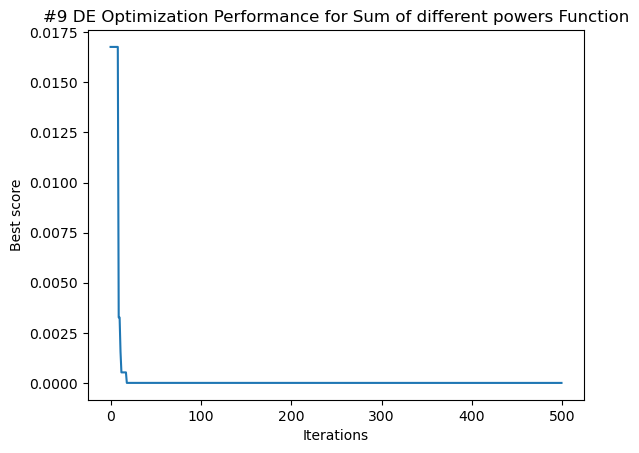

#10 Best solution: [8.73501445e-48 3.45083307e-32], Best score: 0.00000, Time taken: 0.04275 seconds


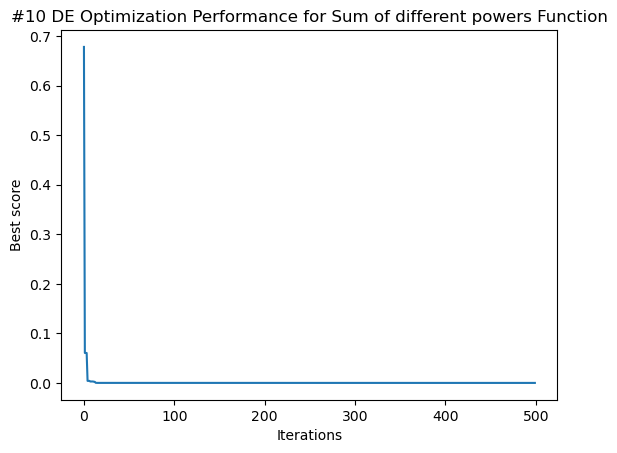

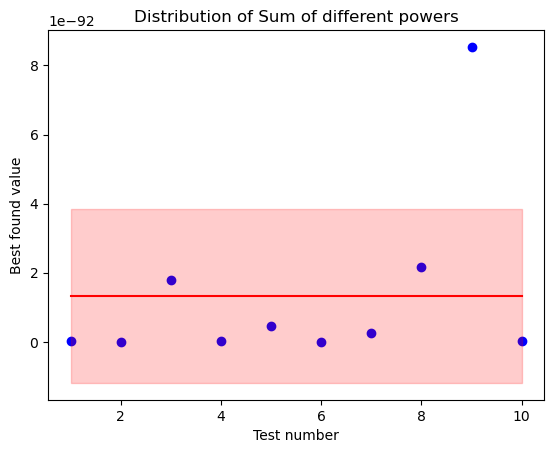

Dispersion is 6.346834974541405e-184


In [14]:
# Optimize Sum of different powers function
print("Optimizing Sum of different powers function")
bounds = np.array([[-5, 5], [-5, 5]])
print(f"dimensions number: {len(bounds)}")
print(f"population size: {POP_SIZE}")
print(f"generations number: {MAX_ITER}")
best_values = []
time_average = 0.0
for i in range(TESTS_AMOUNT):
    (best_solution, best_score, performance), elapsed_time = performance_function(de_optimizer, sum_of_different_powers_function, bounds)
    print(f"#{i + 1} Best solution: {best_solution}, Best score: {best_score:.5f}, Time taken: {elapsed_time:.5f} seconds")
    plt.figure()
    plt.title(f"#{i + 1} DE Optimization Performance for Sum of different powers Function")
    plot_performance(performance)
    best_values.append(best_score)
    time_average += elapsed_time
times_py.append(time_average / TESTS_AMOUNT)
draw_distribution_graphic(best_values, TESTS_AMOUNT, "Sum of different powers")
print("Dispersion is " + str(np.var(best_values)))

In [15]:
@jit(nopython=True)
def booth_function(x):
    return (x[0] + 2*x[1] - 7)**2 + (2*x[0] + x[1] - 5)**2

Optimizing Booth function
dimensions number: 2
population size: 50
generations number: 500
#1 Best solution: [1. 3.], Best score: 0.00000, Time taken: 1.13970 seconds


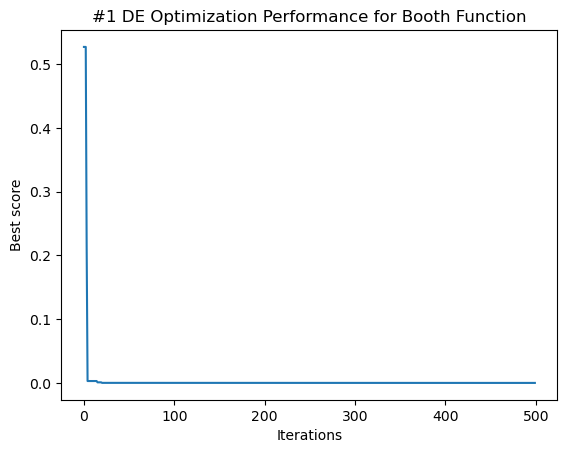

#2 Best solution: [1. 3.], Best score: 0.00000, Time taken: 0.02921 seconds


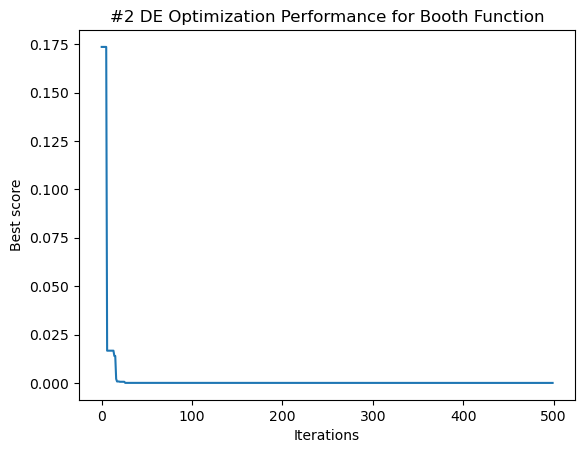

#3 Best solution: [1. 3.], Best score: 0.00000, Time taken: 0.02498 seconds


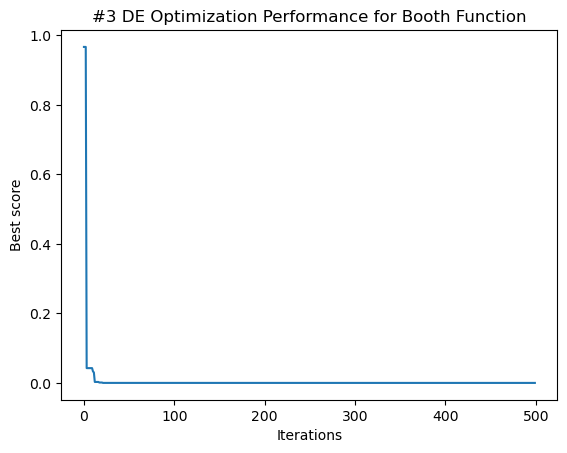

#4 Best solution: [1. 3.], Best score: 0.00000, Time taken: 0.02756 seconds


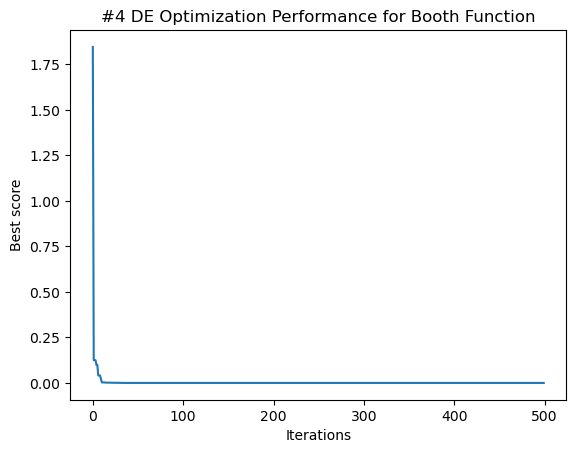

#5 Best solution: [1. 3.], Best score: 0.00000, Time taken: 0.02568 seconds


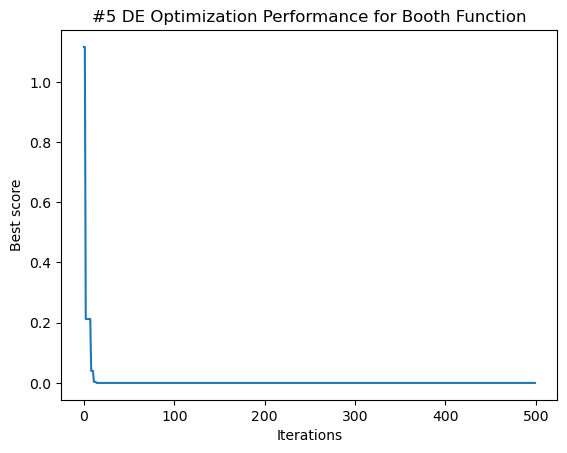

#6 Best solution: [1. 3.], Best score: 0.00000, Time taken: 0.02923 seconds


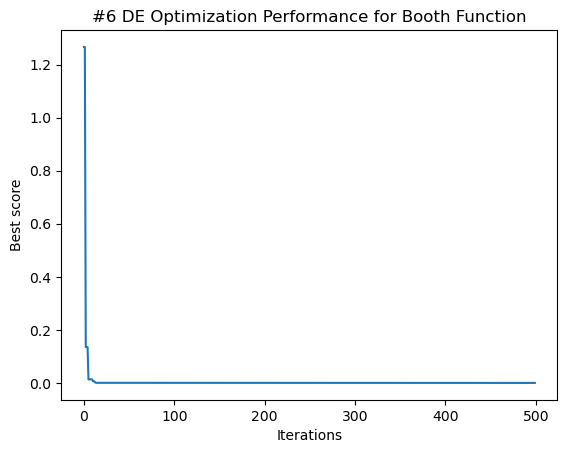

#7 Best solution: [1. 3.], Best score: 0.00000, Time taken: 0.02956 seconds


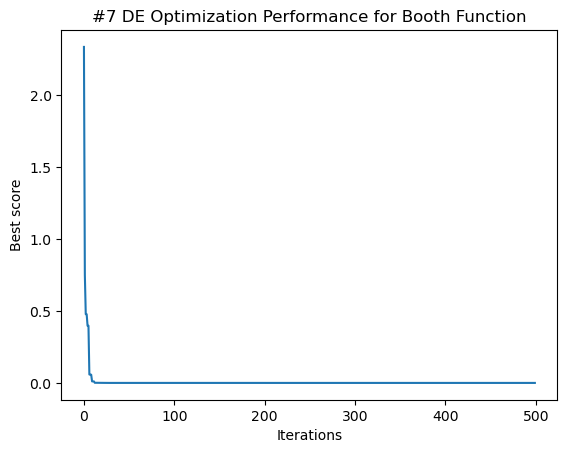

#8 Best solution: [1. 3.], Best score: 0.00000, Time taken: 0.02795 seconds


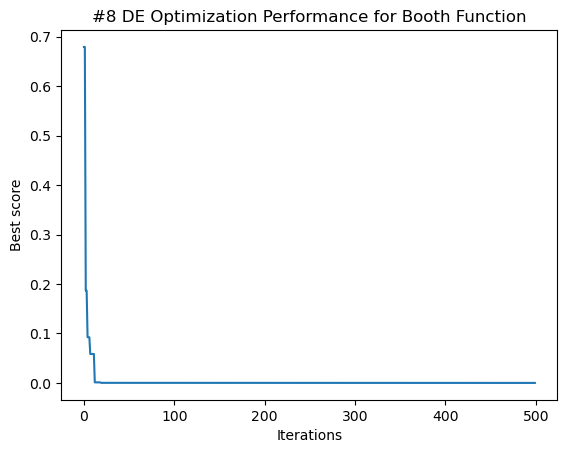

#9 Best solution: [1. 3.], Best score: 0.00000, Time taken: 0.02559 seconds


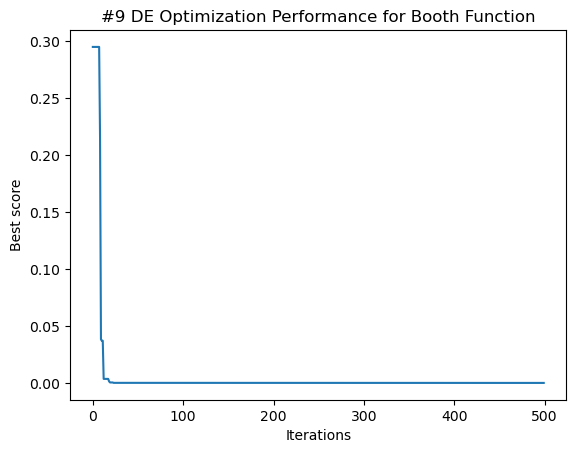

#10 Best solution: [1. 3.], Best score: 0.00000, Time taken: 0.02563 seconds


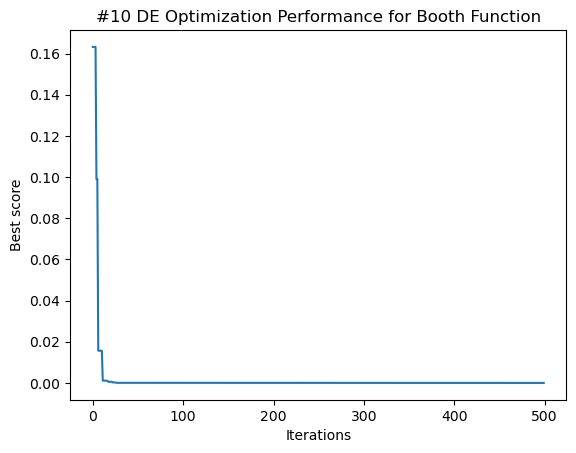

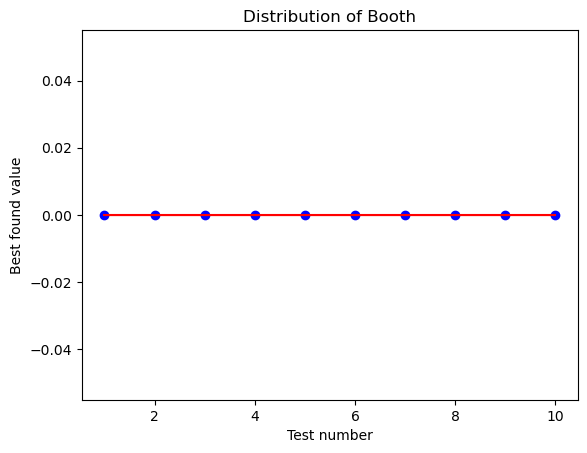

Dispersion is 0.0


In [16]:
# Optimize Booth function
print("Optimizing Booth function")
bounds = np.array([[-5, 5], [-5, 5]])
print(f"dimensions number: {len(bounds)}")
print(f"population size: {POP_SIZE}")
print(f"generations number: {MAX_ITER}")
best_values = []
time_average = 0.0
for i in range(TESTS_AMOUNT):
    (best_solution, best_score, performance), elapsed_time = performance_function(de_optimizer, booth_function, bounds)
    print(f"#{i + 1} Best solution: {best_solution}, Best score: {best_score:.5f}, Time taken: {elapsed_time:.5f} seconds")
    plt.figure()
    plt.title(f"#{i + 1} DE Optimization Performance for Booth Function")
    plot_performance(performance)
    best_values.append(best_score)
    time_average += elapsed_time
times_py.append(time_average / TESTS_AMOUNT)
draw_distribution_graphic(best_values, TESTS_AMOUNT, "Booth")
print("Dispersion is " + str(np.var(best_values)))

In [17]:
@jit(nopython=True)
def beale_function(x):
    return (1.5 - x[0] + x[0]*x[1])**2 + (2.25 - x[0] + x[0]*x[1]**2)**2 + (2.625 - x[0] + x[0]*x[1]**3)**2

Optimizing Beale function
dimensions number: 2
population size: 50
generations number: 500
#1 Best solution: [3.  0.5], Best score: 0.00000, Time taken: 1.06714 seconds


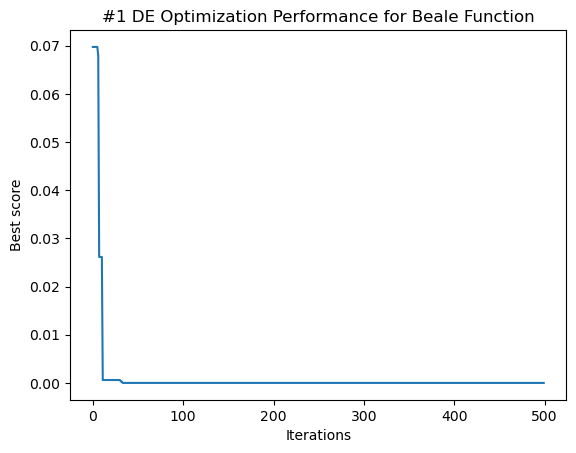

#2 Best solution: [3.  0.5], Best score: 0.00000, Time taken: 0.03358 seconds


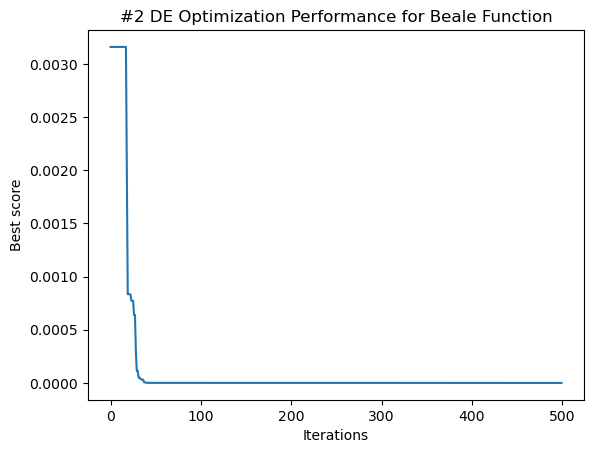

#3 Best solution: [3.  0.5], Best score: 0.00000, Time taken: 0.02698 seconds


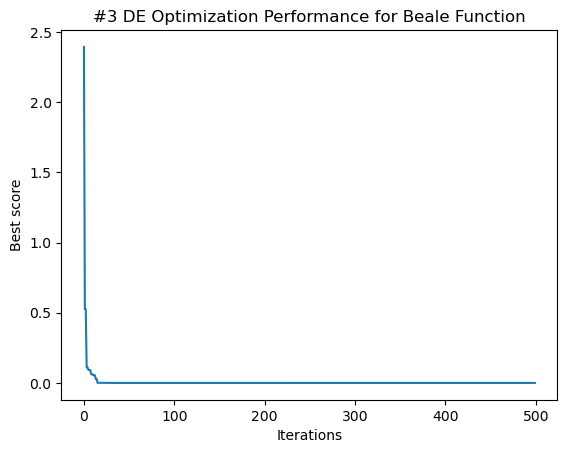

#4 Best solution: [3.  0.5], Best score: 0.00000, Time taken: 0.02639 seconds


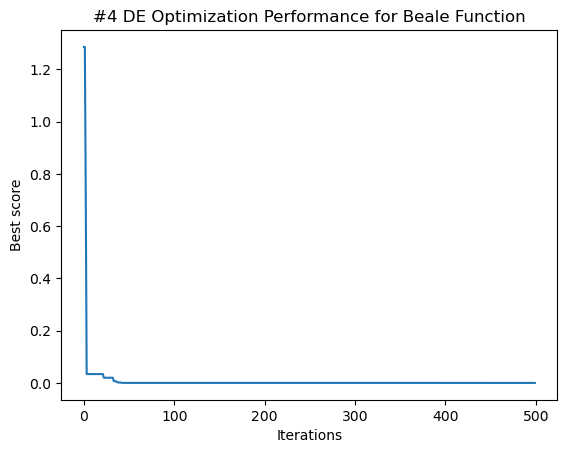

#5 Best solution: [3.  0.5], Best score: 0.00000, Time taken: 0.03281 seconds


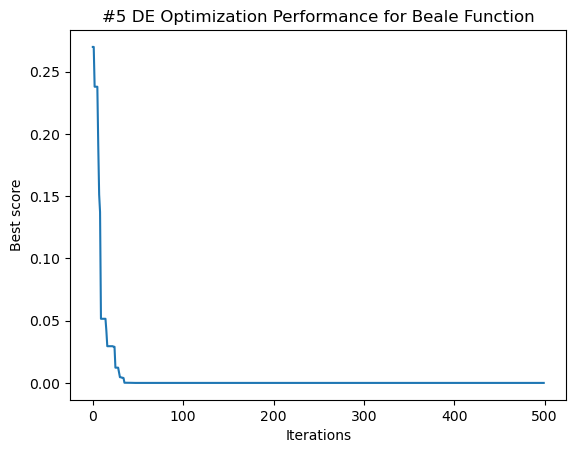

#6 Best solution: [3.  0.5], Best score: 0.00000, Time taken: 0.02631 seconds


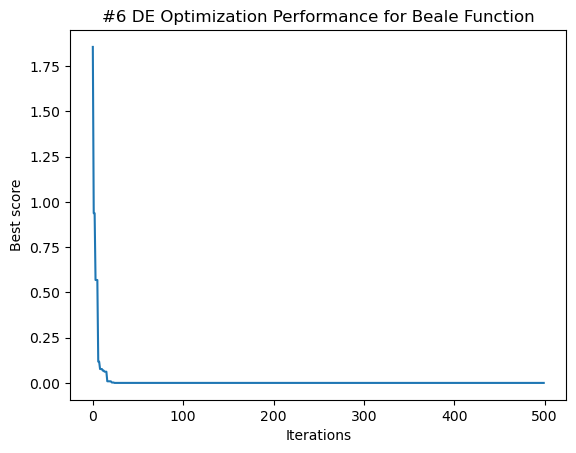

#7 Best solution: [3.  0.5], Best score: 0.00000, Time taken: 0.02580 seconds


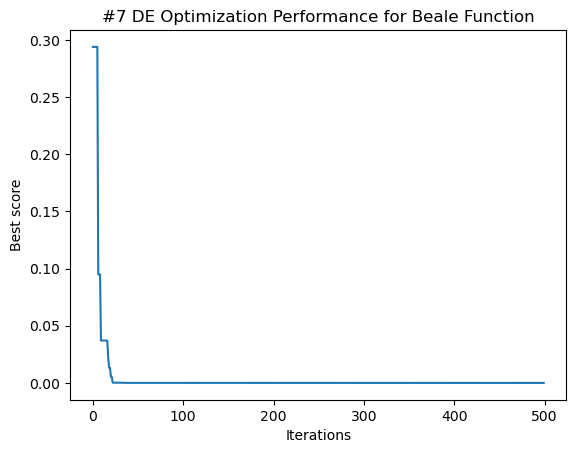

#8 Best solution: [3.  0.5], Best score: 0.00000, Time taken: 0.02773 seconds


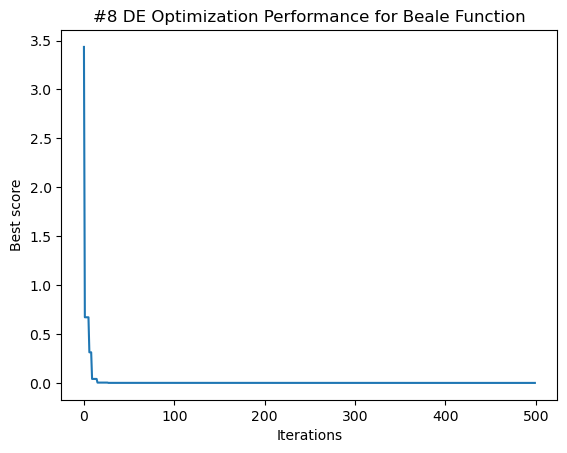

#9 Best solution: [3.  0.5], Best score: 0.00000, Time taken: 0.02581 seconds


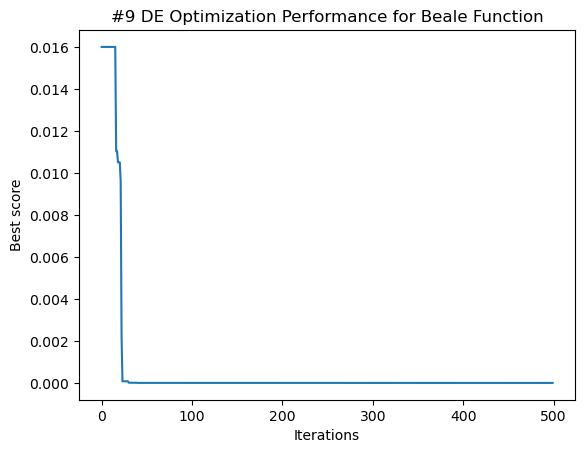

#10 Best solution: [3.  0.5], Best score: 0.00000, Time taken: 0.02752 seconds


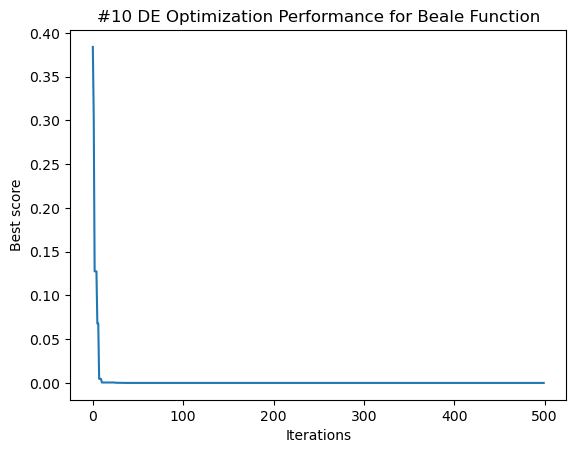

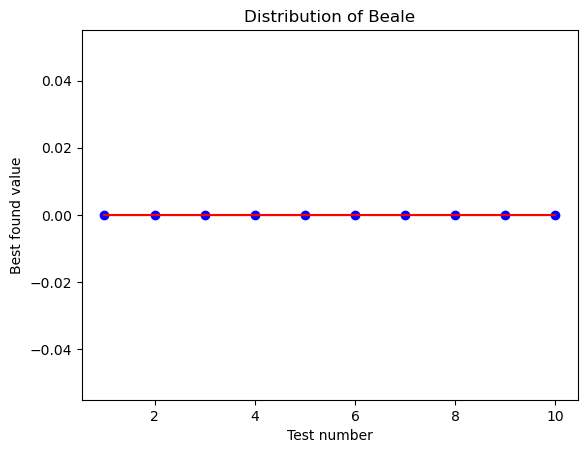

Dispersion is 0.0


In [18]:
# Optimize Beale function
print("Optimizing Beale function")
bounds = np.array([[-5, 5], [-5, 5]])
print(f"dimensions number: {len(bounds)}")
print(f"population size: {POP_SIZE}")
print(f"generations number: {MAX_ITER}")
best_values = []
time_average = 0.0
for i in range(TESTS_AMOUNT):
    (best_solution, best_score, performance), elapsed_time = performance_function(de_optimizer, beale_function, bounds)
    print(f"#{i + 1} Best solution: {best_solution}, Best score: {best_score:.5f}, Time taken: {elapsed_time:.5f} seconds")
    plt.figure()
    plt.title(f"#{i + 1} DE Optimization Performance for Beale Function")
    plot_performance(performance)
    best_values.append(best_score)
    time_average += elapsed_time
times_py.append(time_average / TESTS_AMOUNT)
draw_distribution_graphic(best_values, TESTS_AMOUNT, "Beale")
print("Dispersion is " + str(np.var(best_values)))

In [19]:
@jit(nopython=True)
def goldstein_price_function(x):
    return (1 + (x[0] + x[1] + 1)**2 * (19 - 14*x[0] + 3*x[0]**2 - 14*x[1] + 6*x[0]*x[1] + 3*x[1]**2)) * (30 + (2*x[0] - 3*x[1])**2 * (18 - 32*x[0] + 12*x[0]**2 + 48*x[1] - 36*x[0]*x[1] + 27*x[1]**2))

Optimizing Goldstein-Price function
dimensions number: 2
population size: 50
generations number: 500
#1 Best solution: [ 7.48093088e-10 -1.00000000e+00], Best score: 3.00000, Time taken: 1.00554 seconds


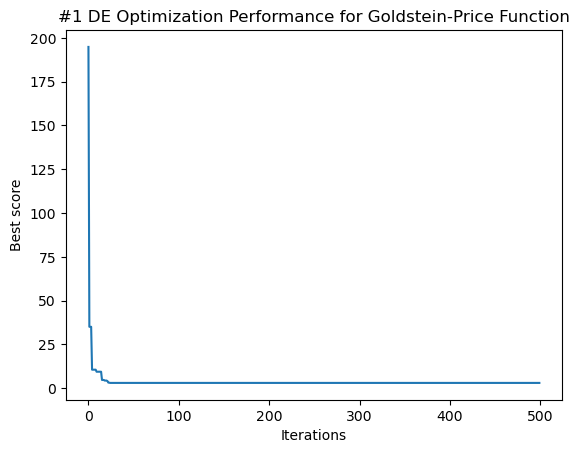

#2 Best solution: [-6.61802221e-10 -9.99999999e-01], Best score: 3.00000, Time taken: 0.03593 seconds


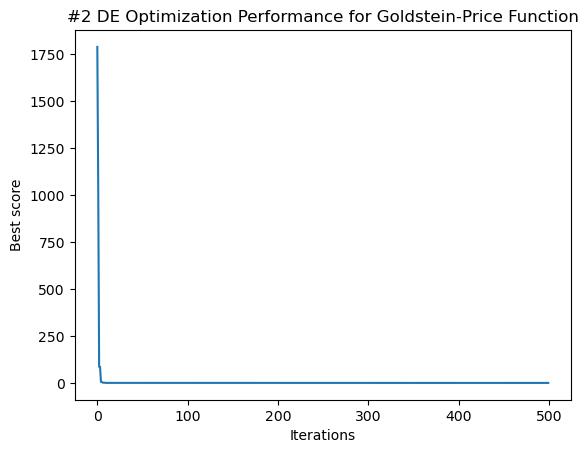

#3 Best solution: [-9.80386494e-10 -1.00000000e+00], Best score: 3.00000, Time taken: 0.03665 seconds


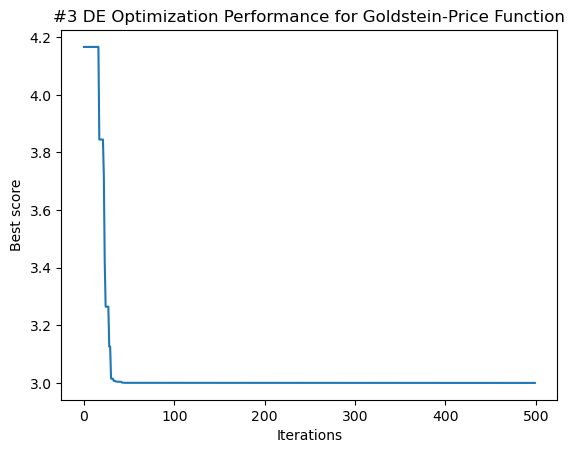

#4 Best solution: [ 1.72815486e-10 -1.00000000e+00], Best score: 3.00000, Time taken: 0.03493 seconds


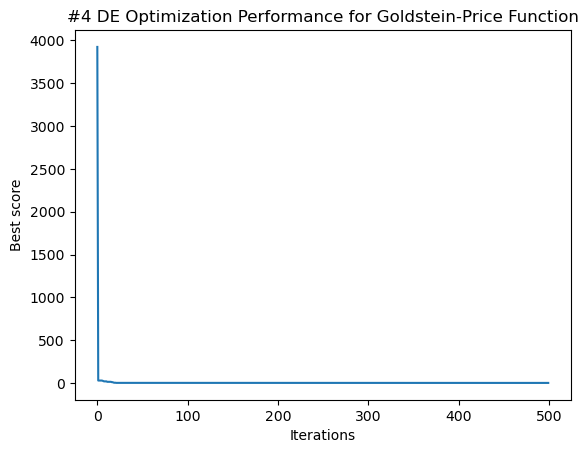

#5 Best solution: [ 4.70612455e-09 -9.99999995e-01], Best score: 3.00000, Time taken: 0.02606 seconds


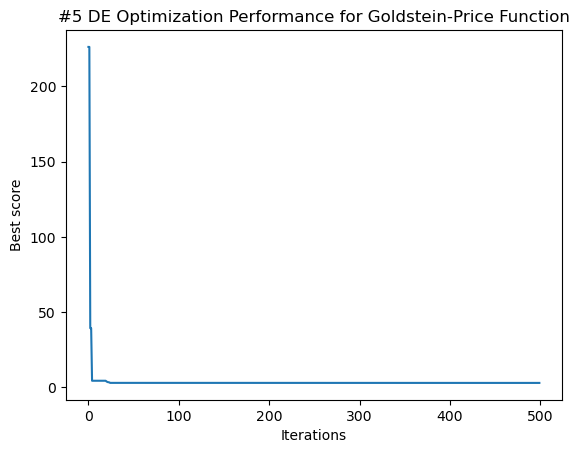

#6 Best solution: [ 1.11640025e-09 -1.00000000e+00], Best score: 3.00000, Time taken: 0.02907 seconds


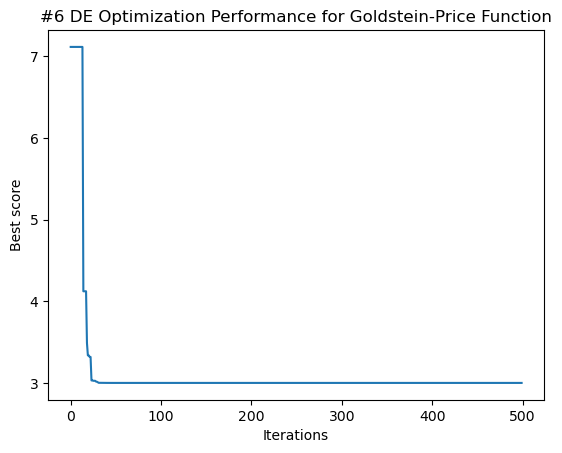

#7 Best solution: [-6.7079858e-10 -1.0000000e+00], Best score: 3.00000, Time taken: 0.02990 seconds


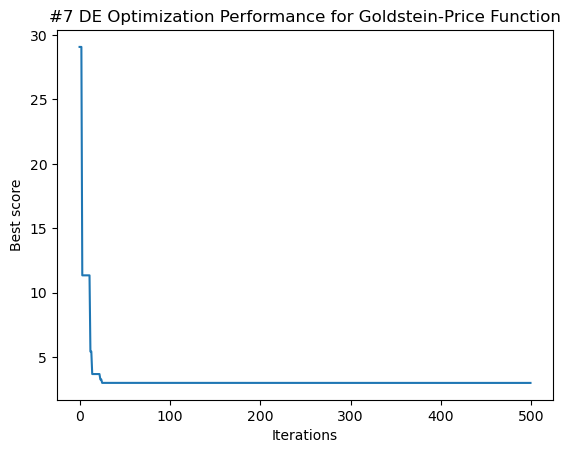

#8 Best solution: [-4.22557083e-09 -1.00000001e+00], Best score: 3.00000, Time taken: 0.02765 seconds


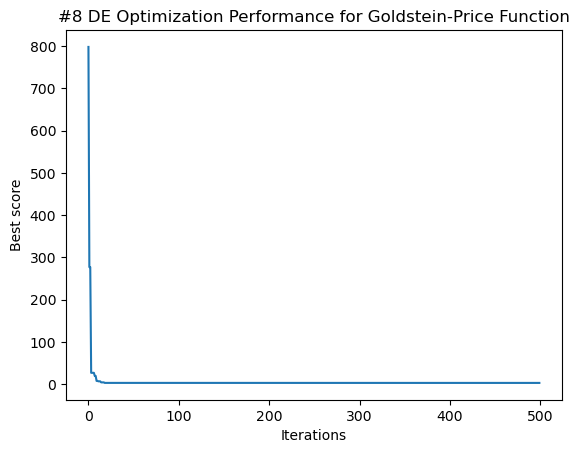

#9 Best solution: [-5.18468875e-10 -1.00000000e+00], Best score: 3.00000, Time taken: 0.02600 seconds


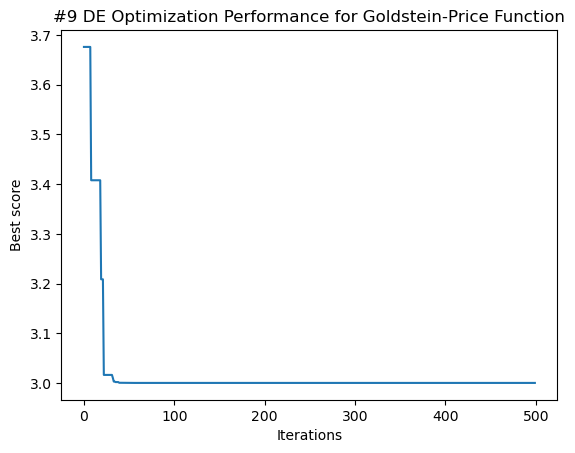

#10 Best solution: [ 8.21928645e-11 -1.00000000e+00], Best score: 3.00000, Time taken: 0.02616 seconds


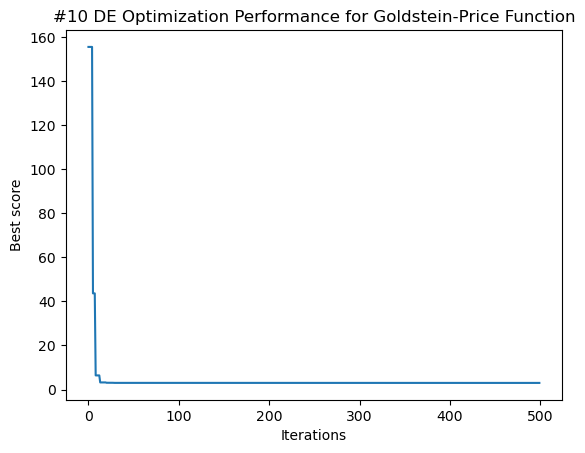

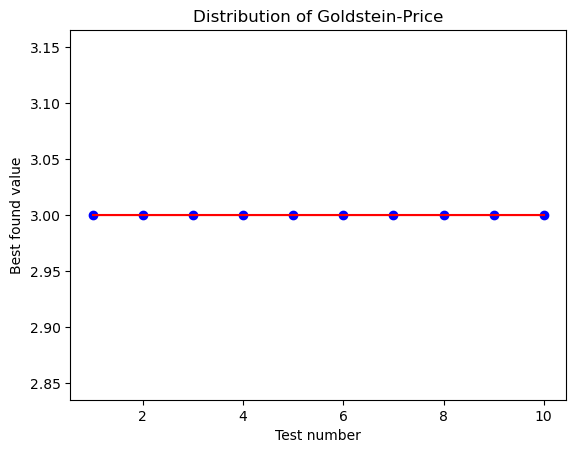

Dispersion is 7.888609052210118e-32


In [20]:
# Optimize Goldstein-Price function
print("Optimizing Goldstein-Price function")
bounds = np.array([[-5, 5], [-5, 5]])
print(f"dimensions number: {len(bounds)}")
print(f"population size: {POP_SIZE}")
print(f"generations number: {MAX_ITER}")
best_values = []
time_average = 0.0
for i in range(TESTS_AMOUNT):
    (best_solution, best_score, performance), elapsed_time = performance_function(de_optimizer, goldstein_price_function, bounds)
    print(f"#{i + 1} Best solution: {best_solution}, Best score: {best_score:.5f}, Time taken: {elapsed_time:.5f} seconds")
    plt.figure()
    plt.title(f"#{i + 1} DE Optimization Performance for Goldstein-Price Function")
    plot_performance(performance)
    best_values.append(best_score)
    time_average += elapsed_time
times_py.append(time_average / TESTS_AMOUNT)
draw_distribution_graphic(best_values, TESTS_AMOUNT, "Goldstein-Price")
print("Dispersion is " + str(np.var(best_values)))

In [21]:
@jit(nopython=True)
def zakharov_function(x):
    return np.sum(x**2) + (np.sum(0.5 * np.arange(1, len(x) + 1) * x))**2 + (np.sum(0.5 * np.arange(1, len(x) + 1) * x))**4

Optimizing Zakharov function
dimensions number: 2
population size: 50
generations number: 500
#1 Best solution: [2.96300255e-39 2.39132068e-39], Best score: 0.00000, Time taken: 1.55168 seconds


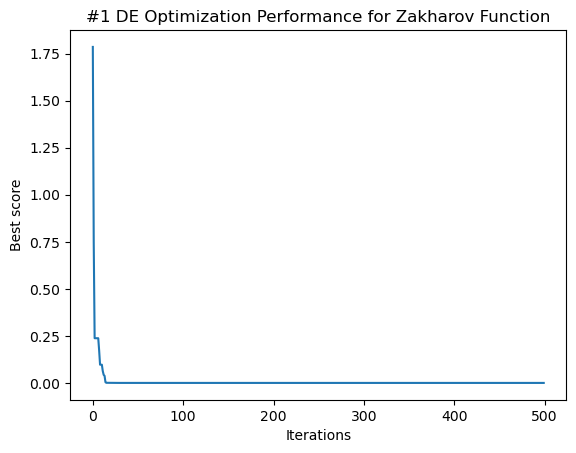

#2 Best solution: [1.99848393e-39 1.30316877e-39], Best score: 0.00000, Time taken: 0.07363 seconds


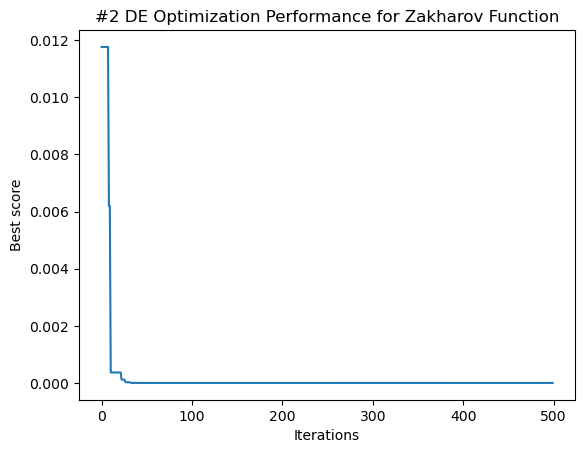

#3 Best solution: [ 1.35701379e-39 -9.28565851e-40], Best score: 0.00000, Time taken: 0.04458 seconds


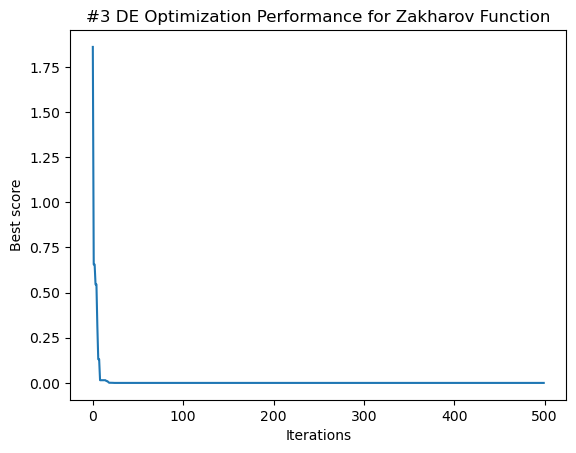

#4 Best solution: [-5.16632508e-41 -1.94009762e-41], Best score: 0.00000, Time taken: 0.05467 seconds


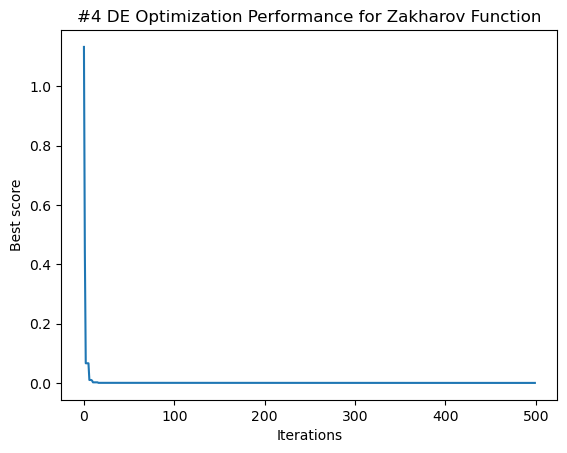

#5 Best solution: [-2.69496844e-40  1.55280962e-40], Best score: 0.00000, Time taken: 0.04704 seconds


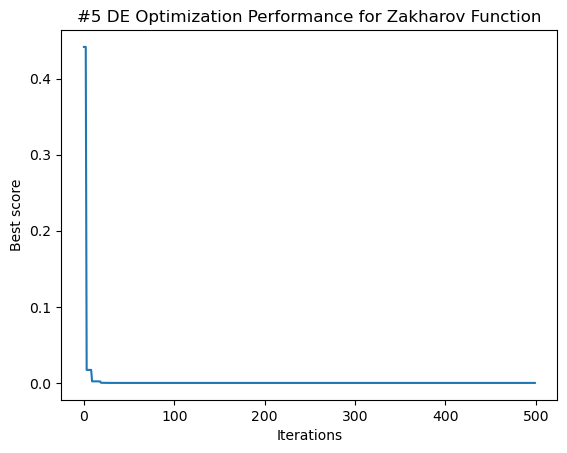

#6 Best solution: [ 1.59614018e-40 -1.00689203e-39], Best score: 0.00000, Time taken: 0.04290 seconds


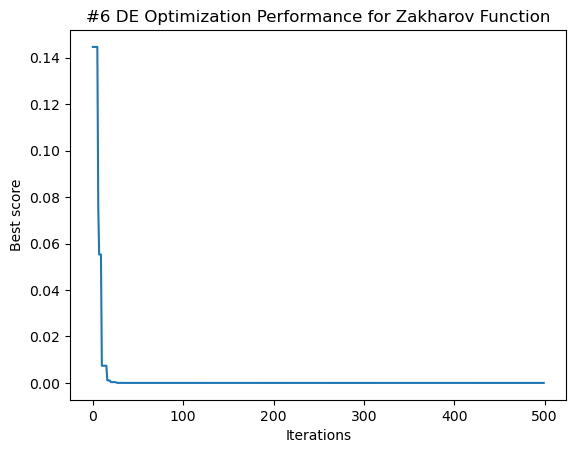

#7 Best solution: [ 2.26764922e-41 -4.09306911e-40], Best score: 0.00000, Time taken: 0.03825 seconds


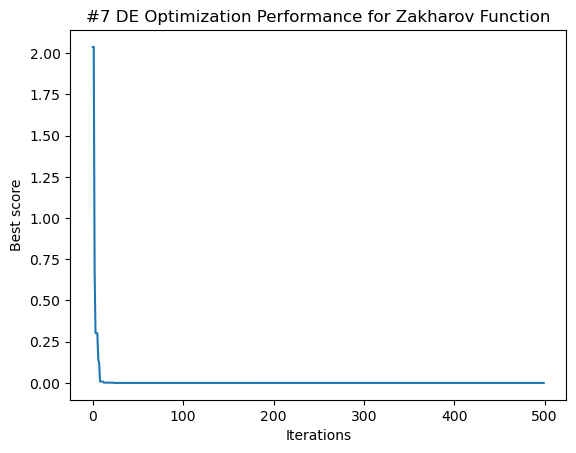

#8 Best solution: [4.94698358e-41 2.91237994e-40], Best score: 0.00000, Time taken: 0.03993 seconds


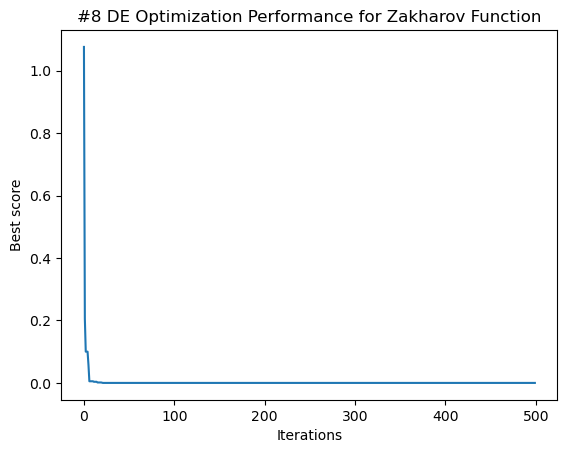

#9 Best solution: [-4.19317683e-40 -7.65460058e-41], Best score: 0.00000, Time taken: 0.04057 seconds


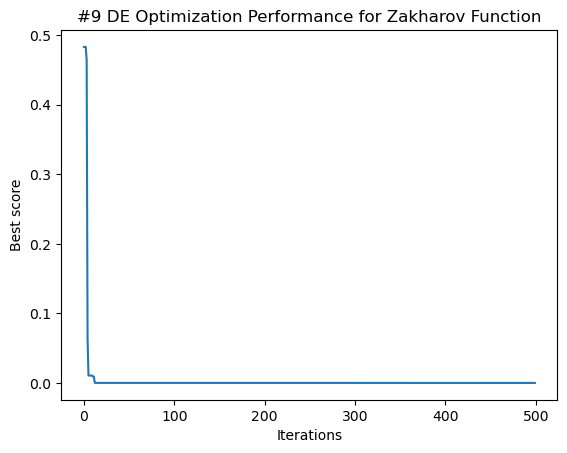

#10 Best solution: [-3.31797987e-40 -6.43078305e-42], Best score: 0.00000, Time taken: 0.04050 seconds


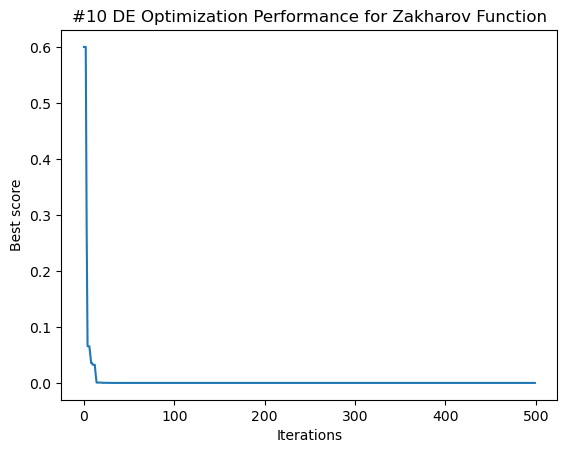

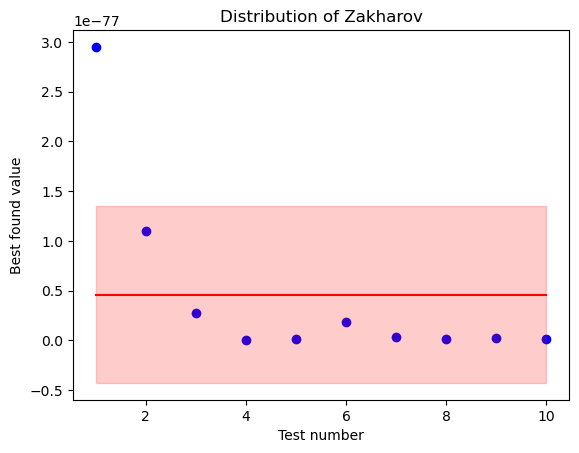

Dispersion is 7.891916068934594e-155


In [22]:
# Optimize Zakharov function
print("Optimizing Zakharov function")
bounds = np.array([[-5, 5], [-5, 5]])
print(f"dimensions number: {len(bounds)}")
print(f"population size: {POP_SIZE}")
print(f"generations number: {MAX_ITER}")
best_values = []
time_average = 0.0
for i in range(TESTS_AMOUNT):
    (best_solution, best_score, performance), elapsed_time = performance_function(de_optimizer, zakharov_function, bounds)
    print(f"#{i + 1} Best solution: {best_solution}, Best score: {best_score:.5f}, Time taken: {elapsed_time:.5f} seconds")
    plt.figure()
    plt.title(f"#{i + 1} DE Optimization Performance for Zakharov Function")
    plot_performance(performance)
    best_values.append(best_score)
    time_average += elapsed_time
times_py.append(time_average / TESTS_AMOUNT)
draw_distribution_graphic(best_values, TESTS_AMOUNT, "Zakharov")
print("Dispersion is " + str(np.var(best_values)))

# Реализация на C

In [23]:
def c(file, name, types, result):
    path = os.path.abspath(file)
    module = ctypes.cdll.LoadLibrary(path)
    func = module[name]
    func.argtypes = types
    func.restype = result
    return func


function_type = ctypes.CFUNCTYPE(ctypes.c_float, ctypes.POINTER(ctypes.c_float))

de_optimizer_c = c(
    "C:/Users/7germ/OneDrive/Рабочий стол/DEonC/libcode.dll",
    "de_optimizer",
    (
        function_type,
        (ctypes.c_float * 2) * MAX_DIMENSIONS,
        ctypes.c_int,
        ctypes.c_int,
        ctypes.c_int,
        ctypes.c_float,
        ctypes.c_float,
    ),
    ctypes.POINTER(ctypes.c_float)
)

In [24]:
def testing(func, bounds, n_dims, pop_size, max_iter, f, cr, func_name):
    print(f"Optimizing {func_name} function")
    best_values = []
    time_average = 0.0
    for i in range(TESTS_AMOUNT):
        start_time = time.perf_counter()
        result = de_optimizer_c(func, bounds, n_dims, pop_size, max_iter, f, cr)
        end_time = time.perf_counter()
        elapsed_time = end_time - start_time
        time_average += elapsed_time
        print(
            f"#{i + 1} Best solution: {result[0], result[1]}, Best score: {result[2]:.5f}, Time taken: {elapsed_time:.5f} seconds")
        best_values.append(result[2])
    times.append(time_average / TESTS_AMOUNT)
    draw_distribution_graphic(best_values, TESTS_AMOUNT, func_name)
    print("Dispersion is " + str(np.var(best_values)))

# Функции для тестирования

In [25]:
def rosenbrock_function(x_ptr):
    x = np.ctypeslib.as_array(x_ptr, shape=(MAX_DIMENSIONS,))
    return np.sum(100.0 * (x[1:] - x[:-1]**2.0)**2.0 + (1 - x[:-1])**2.0)

Optimizing Rosenbrock function
#1 Best solution: (1.0, 1.0), Best score: 0.00000, Time taken: 0.52564 seconds
#2 Best solution: (1.0, 1.0), Best score: 0.00000, Time taken: 0.47831 seconds
#3 Best solution: (1.0, 1.0), Best score: 0.00000, Time taken: 0.49513 seconds
#4 Best solution: (1.0, 1.0), Best score: 0.00000, Time taken: 0.47739 seconds
#5 Best solution: (1.0, 1.0), Best score: 0.00000, Time taken: 0.48797 seconds
#6 Best solution: (1.0, 1.0), Best score: 0.00000, Time taken: 0.53545 seconds
#7 Best solution: (1.0, 1.0), Best score: 0.00000, Time taken: 0.47848 seconds
#8 Best solution: (1.0, 1.0), Best score: 0.00000, Time taken: 0.53143 seconds
#9 Best solution: (1.0, 1.0), Best score: 0.00000, Time taken: 0.48872 seconds
#10 Best solution: (1.0, 1.0), Best score: 0.00000, Time taken: 0.51658 seconds


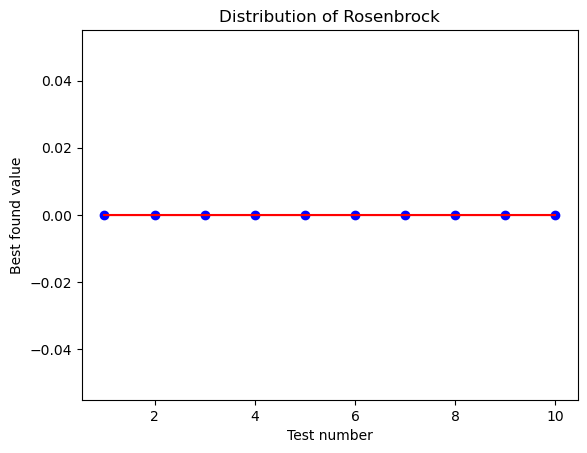

Dispersion is 0.0


In [26]:
# Optimize Rosenbrock function
bounds = (ctypes.c_float * 2) * MAX_DIMENSIONS
bounds = bounds()
bounds[0][0] = -5.0
bounds[0][1] = 5.0
bounds[1][0] = -5.0
bounds[1][1] = 5.0
callback_pointer = function_type(rosenbrock_function)
testing(callback_pointer, bounds, 2, 50, MAX_ITER, 0.8, 0.9, "Rosenbrock")

In [27]:
def de_jong_function(x_ptr):
    x = np.ctypeslib.as_array(x_ptr, shape=(MAX_DIMENSIONS,))
    return np.sum(x**2.0)

dimensions number: 2
population size: 50
generations number: 500
Optimizing De Jong (Sphere) function
#1 Best solution: (-2.8839492517431838e-24, -2.5858734255399932e-23), Best score: 0.00000, Time taken: 0.32594 seconds
#2 Best solution: (1.996475684659752e-23, 1.809342731811948e-23), Best score: 0.00000, Time taken: 0.30311 seconds
#3 Best solution: (5.624237466314759e-24, -1.723494470484728e-23), Best score: 0.00000, Time taken: 0.31551 seconds
#4 Best solution: (1.7352024284956563e-23, 1.6766866198125342e-23), Best score: 0.00000, Time taken: 0.32727 seconds
#5 Best solution: (-8.39838359093842e-24, 1.2073680237475872e-23), Best score: 0.00000, Time taken: 0.31202 seconds
#6 Best solution: (-1.4370305190342097e-23, 2.2416612270671327e-23), Best score: 0.00000, Time taken: 0.30732 seconds
#7 Best solution: (-2.235826180723394e-23, 1.2780152509755601e-23), Best score: 0.00000, Time taken: 0.30418 seconds
#8 Best solution: (-6.2033292127848304e-24, -2.0098771692620087e-23), Best score

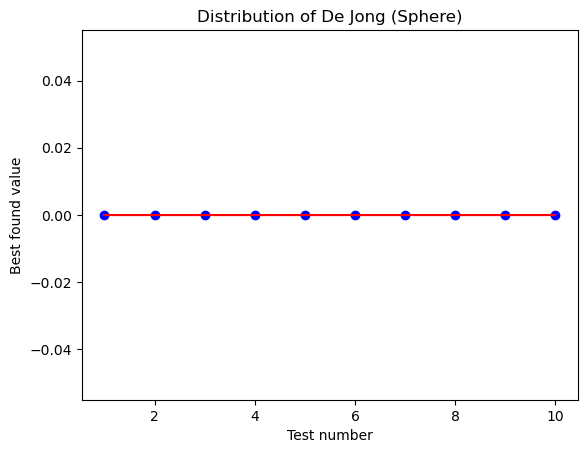

Dispersion is 0.0


In [28]:
# Optimize De Jong (Sphere) function
bounds = (ctypes.c_float * 2) * MAX_DIMENSIONS
bounds = bounds()
bounds[0][0] = -5.0
bounds[0][1] = 5.0
bounds[1][0] = -5.0
bounds[1][1] = 5.0
print(f"dimensions number: {len(bounds)}")
print(f"population size: {POP_SIZE}")
print(f"generations number: {MAX_ITER}")
callback_pointer = function_type(de_jong_function)
testing(callback_pointer, bounds, 2, 50, MAX_ITER, 0.8, 0.9, "De Jong (Sphere)")

In [29]:
def schwefel_function(x_ptr):
    x = np.ctypeslib.as_array(x_ptr, shape=(MAX_DIMENSIONS,))
    x = np.clip(x, -500.0, 500.0)
    return np.sum(x * np.sin(np.sqrt(np.abs(x))))

dimensions number: 2
population size: 50
generations number: 500
Optimizing Schwefel function
#1 Best solution: (-420.9651794433594, -420.9621276855469), Best score: -837.96588, Time taken: 0.81421 seconds
#2 Best solution: (-420.9621276855469, -420.9690856933594), Best score: -837.96588, Time taken: 0.81247 seconds
#3 Best solution: (-420.9622802734375, -420.97503662109375), Best score: -837.96588, Time taken: 0.79593 seconds
#4 Best solution: (-420.9690856933594, -420.9721374511719), Best score: -837.96588, Time taken: 0.80807 seconds
#5 Best solution: (-420.9690856933594, -420.9743347167969), Best score: -837.96588, Time taken: 0.79541 seconds
#6 Best solution: (-420.96533203125, -420.9622802734375), Best score: -837.96588, Time taken: 0.79703 seconds
#7 Best solution: (-420.9690856933594, -420.9682312011719), Best score: -837.96588, Time taken: 0.83616 seconds
#8 Best solution: (-420.9651794433594, -420.9690856933594), Best score: -837.96588, Time taken: 0.86028 seconds
#9 Best sol

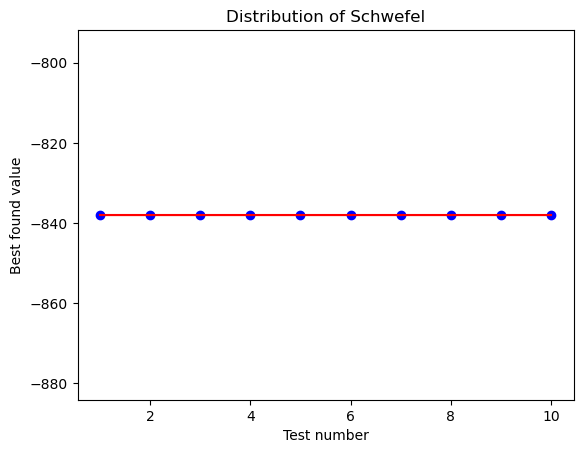

Dispersion is 0.0


In [30]:
# Optimize Schwefel function
bounds = (ctypes.c_float * 2) * MAX_DIMENSIONS
bounds = bounds()
bounds[0][0] = -500.0
bounds[0][1] = 500.0
bounds[1][0] = -500.0
bounds[1][1] = 500.0
print(f"dimensions number: {len(bounds)}")
print(f"population size: {POP_SIZE}")
print(f"generations number: {MAX_ITER}")
callback_pointer = function_type(schwefel_function)
testing(callback_pointer, bounds, 2, 50, MAX_ITER, 0.8, 0.9, "Schwefel")

In [31]:
def sum_of_different_powers_function(x_ptr):
    x = np.ctypeslib.as_array(x_ptr, shape=(MAX_DIMENSIONS,))
    return np.sum(np.abs(x)**(np.arange(len(x)) + 1.0))

dimensions number: 2
population size: 50
generations number: 500
Optimizing Sum of Different Powers function
#1 Best solution: (0.0, 4.8975955984103385e-24), Best score: 0.00000, Time taken: 0.44797 seconds
#2 Best solution: (0.0, 5.2772672523450645e-24), Best score: 0.00000, Time taken: 0.42275 seconds
#3 Best solution: (0.0, -1.2361557669896365e-23), Best score: 0.00000, Time taken: 0.44409 seconds
#4 Best solution: (0.0, 9.40796777744027e-24), Best score: 0.00000, Time taken: 0.42336 seconds
#5 Best solution: (0.0, 1.509516896576615e-24), Best score: 0.00000, Time taken: 0.45351 seconds
#6 Best solution: (0.0, -5.910612907571711e-24), Best score: 0.00000, Time taken: 0.44831 seconds
#7 Best solution: (0.0, -1.4517079072645708e-23), Best score: 0.00000, Time taken: 0.44606 seconds
#8 Best solution: (0.0, -1.1538723680931105e-23), Best score: 0.00000, Time taken: 0.43670 seconds
#9 Best solution: (0.0, -4.225656501117564e-24), Best score: 0.00000, Time taken: 0.46500 seconds
#10 Best 

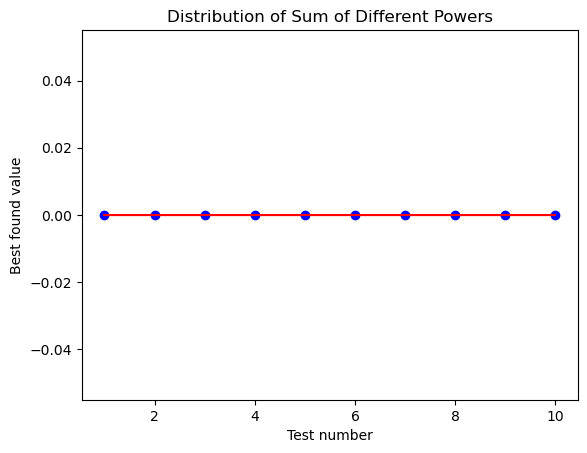

Dispersion is 0.0


In [32]:
# Optimize Sum of Different Powers function
bounds = (ctypes.c_float * 2) * MAX_DIMENSIONS
bounds = bounds()
bounds[0][0] = -5.0
bounds[0][1] = 5.0
bounds[1][0] = -5.0
bounds[1][1] = 5.0
print(f"dimensions number: {len(bounds)}")
print(f"population size: {POP_SIZE}")
print(f"generations number: {MAX_ITER}")
callback_pointer = function_type(sum_of_different_powers_function)
testing(callback_pointer, bounds, 2, 50, MAX_ITER, 0.8, 0.9, "Sum of Different Powers")

In [33]:
def booth_function(x):
    return (x[0] + 2.0*x[1] - 7.0)**2.0 + (2.0*x[0] + x[1] - 5.0)**2.0

dimensions number: 2
population size: 50
generations number: 500
Optimizing Booth function
#1 Best solution: (1.0, 3.0), Best score: 0.00000, Time taken: 0.02834 seconds
#2 Best solution: (1.0, 3.0), Best score: 0.00000, Time taken: 0.02445 seconds
#3 Best solution: (1.0, 3.0), Best score: 0.00000, Time taken: 0.02351 seconds
#4 Best solution: (1.0, 3.0), Best score: 0.00000, Time taken: 0.03160 seconds
#5 Best solution: (1.0, 3.0), Best score: 0.00000, Time taken: 0.03119 seconds
#6 Best solution: (1.0, 3.0), Best score: 0.00000, Time taken: 0.04762 seconds
#7 Best solution: (1.0, 3.0), Best score: 0.00000, Time taken: 0.03064 seconds
#8 Best solution: (1.0, 3.0), Best score: 0.00000, Time taken: 0.02618 seconds
#9 Best solution: (1.0, 3.0), Best score: 0.00000, Time taken: 0.03000 seconds
#10 Best solution: (1.0, 3.0), Best score: 0.00000, Time taken: 0.02522 seconds


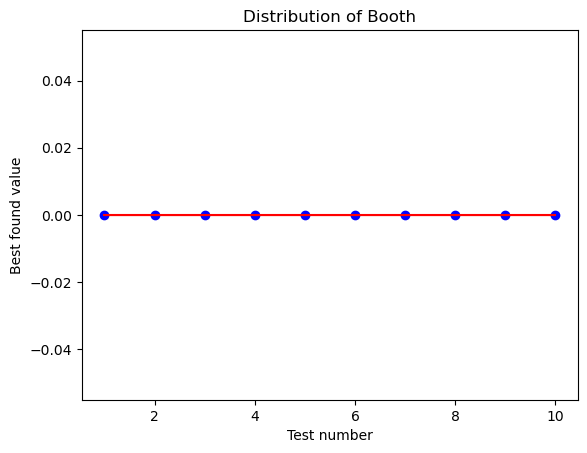

Dispersion is 0.0


In [34]:
# Optimize Booth function
bounds = (ctypes.c_float * 2) * MAX_DIMENSIONS
bounds = bounds()
bounds[0][0] = -5.0
bounds[0][1] = 5.0
bounds[1][0] = -5.0
bounds[1][1] = 5.0
print(f"dimensions number: {len(bounds)}")
print(f"population size: {POP_SIZE}")
print(f"generations number: {MAX_ITER}")
callback_pointer = function_type(booth_function)
testing(callback_pointer, bounds, 2, 50, MAX_ITER, 0.8, 0.9, "Booth")

In [35]:
def beale_function(x):
    return (1.5 - x[0] + x[0]*x[1])**2.0 + (2.25 - x[0] + x[0]*x[1]**2.0)**2.0 + (2.625 - x[0] + x[0]*x[1]**3.0)**2.0

dimensions number: 2
population size: 50
generations number: 500
Optimizing Beale function
#1 Best solution: (3.0, 0.5), Best score: 0.00000, Time taken: 0.04820 seconds
#2 Best solution: (3.0, 0.5), Best score: 0.00000, Time taken: 0.04918 seconds
#3 Best solution: (3.0, 0.5), Best score: 0.00000, Time taken: 0.05259 seconds
#4 Best solution: (3.0, 0.5), Best score: 0.00000, Time taken: 0.05588 seconds
#5 Best solution: (3.0, 0.5), Best score: 0.00000, Time taken: 0.05617 seconds
#6 Best solution: (3.0, 0.5), Best score: 0.00000, Time taken: 0.04764 seconds
#7 Best solution: (3.0, 0.5), Best score: 0.00000, Time taken: 0.04262 seconds
#8 Best solution: (3.0, 0.5), Best score: 0.00000, Time taken: 0.03748 seconds
#9 Best solution: (3.0, 0.5), Best score: 0.00000, Time taken: 0.04260 seconds
#10 Best solution: (3.0, 0.5), Best score: 0.00000, Time taken: 0.03977 seconds


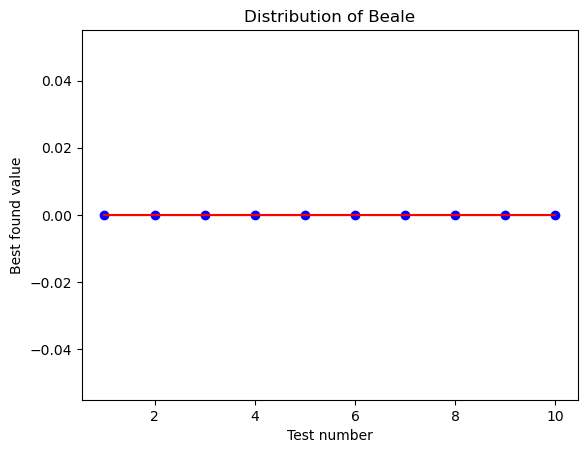

Dispersion is 0.0


In [36]:
# Optimize Beale function
bounds = (ctypes.c_float * 2) * MAX_DIMENSIONS
bounds = bounds()
bounds[0][0] = -5.0
bounds[0][1] = 5.0
bounds[1][0] = -5.0
bounds[1][1] = 5.0
print(f"dimensions number: {len(bounds)}")
print(f"population size: {POP_SIZE}")
print(f"generations number: {MAX_ITER}")
callback_pointer = function_type(beale_function)
testing(callback_pointer, bounds, 2, 50, MAX_ITER, 0.8, 0.9, "Beale")

In [37]:
def goldstein_price_function(x):
    return (1.0 + (x[0] + x[1] + 1.0)**2.0 * (19.0 - 14.0*x[0] + 3.0*x[0]**2.0 - 14.0*x[1] + 6.0*x[0]*x[1] + 3.0*x[1]**2.0)) * \
           (30.0 + (2.0*x[0] - 3.0*x[1])**2.0 * (18.0 - 32.0*x[0] + 12.0*x[0]**2.0 + 48.0*x[1] - 36.0*x[0]*x[1] + 27.0*x[1]**2.0))

dimensions number: 2
population size: 50
generations number: 500
Optimizing Goldstein-Price function
#1 Best solution: (2.6308553060516715e-06, -0.9999864101409912), Best score: 3.00000, Time taken: 0.08073 seconds
#2 Best solution: (-1.754183176672086e-05, -0.999998152256012), Best score: 3.00000, Time taken: 0.07430 seconds
#3 Best solution: (1.5194731531664729e-05, -0.9999962449073792), Best score: 3.00000, Time taken: 0.07493 seconds
#4 Best solution: (-1.2616015737876296e-05, -0.9999980926513672), Best score: 3.00000, Time taken: 0.06346 seconds
#5 Best solution: (-6.109126843512058e-06, -1.0000015497207642), Best score: 3.00000, Time taken: 0.06178 seconds
#6 Best solution: (-1.1814976460300386e-05, -0.9999988079071045), Best score: 3.00000, Time taken: 0.07227 seconds
#7 Best solution: (-1.598679955350235e-05, -0.9999963045120239), Best score: 3.00000, Time taken: 0.06902 seconds
#8 Best solution: (-1.4197605196386576e-05, -1.0000131130218506), Best score: 3.00000, Time taken: 0

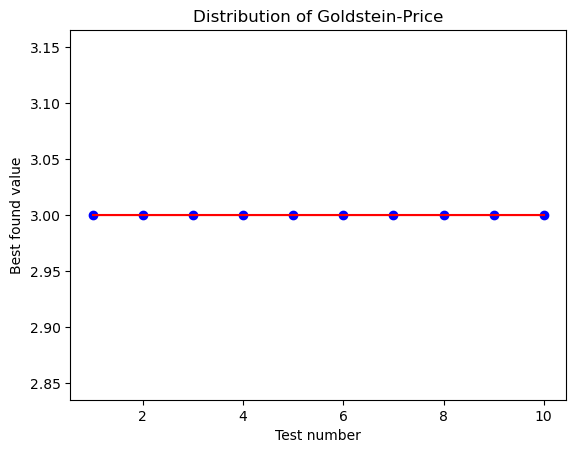

Dispersion is 0.0


In [38]:
# Optimize Goldstein-Price function
bounds = (ctypes.c_float * 2) * MAX_DIMENSIONS
bounds = bounds()
bounds[0][0] = -5.0
bounds[0][1] = 5.0
bounds[1][0] = -5.0
bounds[1][1] = 5.0
print(f"dimensions number: {len(bounds)}")
print(f"population size: {POP_SIZE}")
print(f"generations number: {MAX_ITER}")
callback_pointer = function_type(goldstein_price_function)
testing(callback_pointer, bounds, 2, 50, MAX_ITER, 0.8, 0.9, "Goldstein-Price")

In [39]:
def zakharov_function(x_ptr):
    x = np.ctypeslib.as_array(x_ptr, shape=(MAX_DIMENSIONS,))
    return np.sum(x**2) + (np.sum(0.5 * np.arange(1, len(x) + 1) * x))**2 + (np.sum(0.5 * np.arange(1, len(x) + 1) * x))**4

dimensions number: 2
population size: 50
generations number: 500
Optimizing Zakharov function
#1 Best solution: (1.3587113039586004e-23, -7.400196866795202e-24), Best score: 0.00000, Time taken: 0.89011 seconds
#2 Best solution: (-2.109975729525503e-23, 2.01688509399963e-23), Best score: 0.00000, Time taken: 0.82681 seconds
#3 Best solution: (1.05478970290336e-23, -3.0740394863524806e-24), Best score: 0.00000, Time taken: 0.83499 seconds
#4 Best solution: (-9.420479111397076e-24, -1.2471464926655377e-24), Best score: 0.00000, Time taken: 0.79158 seconds
#5 Best solution: (2.0482707139747533e-23, 9.446868086398529e-24), Best score: 0.00000, Time taken: 0.85853 seconds
#6 Best solution: (-1.2230120821312061e-23, -5.371372836311595e-24), Best score: 0.00000, Time taken: 0.78510 seconds
#7 Best solution: (-1.6549437199984705e-23, -1.5437272696811535e-23), Best score: 0.00000, Time taken: 0.86079 seconds
#8 Best solution: (-7.382475895420317e-24, 4.661868182712196e-24), Best score: 0.00000,

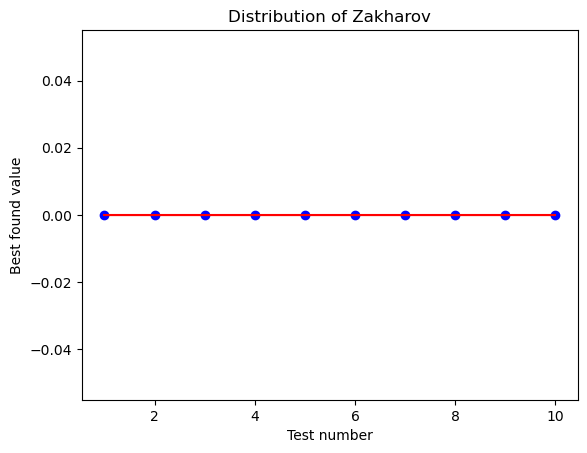

Dispersion is 0.0


In [40]:
# Optimize Zakharov function
bounds = (ctypes.c_float * 2) * MAX_DIMENSIONS
bounds = bounds()
bounds[0][0] = -5.0
bounds[0][1] = 5.0
bounds[1][0] = -5.0
bounds[1][1] = 5.0
print(f"dimensions number: {len(bounds)}")
print(f"population size: {POP_SIZE}")
print(f"generations number: {MAX_ITER}")
callback_pointer = function_type(zakharov_function)
testing(callback_pointer, bounds, 2, 50, MAX_ITER, 0.8, 0.9, "Zakharov")

In [41]:
def plot_barchart(array1, array2):
    x_labels = ["Rosenbrock function", "De Jong (Sphere) function", "Schwefel test", 
                "Sum of Different Powers function", "Booth test", "Beale function", 
                "Goldstein-Price function", "Zakharov function"]
    x_pos = np.arange(len(x_labels))
    fig, ax = plt.subplots()
    ax.bar(x_pos - 0.22, array1, 0.44, label="Python with Numba")
    ax.bar(x_pos + 0.22, array2, 0.44, label="C realization")
    ax.set_xticks(x_pos)
    ax.set_xticklabels(x_labels, rotation=45, ha='right')
    ax.set_ylabel("Time")
    ax.legend()
    for i in range(len(array1)):
        ax.text(i-0.22, array1[i]+0.005, str(round(array1[i], 4)), color='black', 
                fontweight='bold', fontsize=6, ha='center', va='bottom')
        ax.text(i+0.22, array2[i]+0.005, str(round(array2[i], 4)), color='black', 
                fontweight='bold', fontsize=6, ha='center', va='bottom')
    plt.subplots_adjust(top=0.9)
    plt.show()

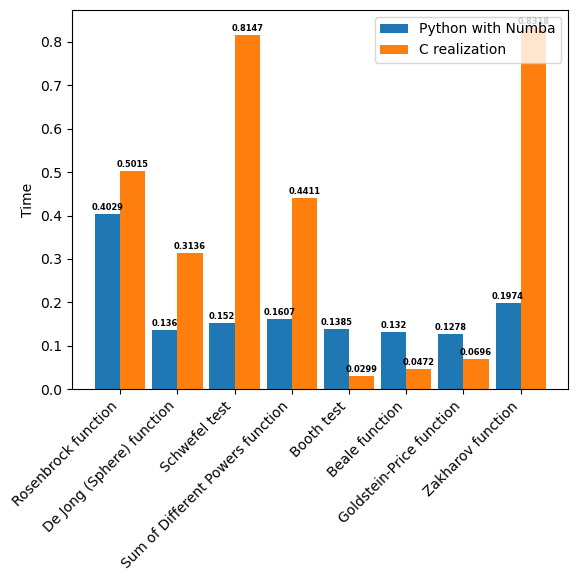

In [42]:
times = np.array(times)
plot_barchart(times_py, times)

# Тестирование на многомерных функциях и сравнение с реализацией без использования Numba

In [57]:
def draw_comparison_graphic(best_values_numba, best_values_original, tests_amount, function_name, times_num, times_nonum):
    x = np.arange(1, tests_amount + 1)

    fig, ax = plt.subplots()
    ax.set_ylabel('Function Value')
    ax.bar(x - 0.2, best_values_numba, width=0.4, label='Python with Numba')
    ax.bar(x + 0.2, best_values_original, width=0.4, label='Python without Numba')
    ax.set_xticks(x)
    ax.set_xticklabels(range(1, tests_amount + 1))
    ax.set_title(f'{function_name} Comparison')
    ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), fancybox=True, ncol=2)

    for i in range(tests_amount):
        ax.text(x[i] - 0.2, best_values_numba[i] + 0.1, f"{times_num[i]:.2f}s", ha='center', fontsize=6)
        ax.text(x[i] + 0.2, best_values_original[i] + 0.1, f"{times_nonum[i]:.2f}s", ha='center', fontsize=6)

    plt.show()

In [58]:
def find_best_values(func, bounds, n_dims, pop_size, max_iter, f, cr, func_name):
    print(f"Optimizing {func_name} function")
    best_values = []
    time_average = 0.0
    times_ = []
    for i in range(TESTS_AMOUNT-2):
        start_time = time.perf_counter()
        best_solution, best_score, _ = de_optimizer(func, bounds, pop_size, max_iter, f, cr)
        end_time = time.perf_counter()
        elapsed_time = end_time - start_time
        time_average += elapsed_time
        times_.append(elapsed_time)
        print(
            f"#{i + 1} Best solution: {best_solution}, Best score: {best_score:.5f}, Time taken: {elapsed_time:.5f} seconds")
        best_values.append(best_score)
    return best_values, times

In [59]:
def find_best_values_(func, bounds, n_dims, pop_size, max_iter, f, cr, func_name):
    print(f"Optimizing {func_name} function")
    best_values = []
    time_average = 0.0
    times_ = []
    for i in range(TESTS_AMOUNT-2):
        start_time = time.perf_counter()
        best_solution, best_score, _ = de_optimizer_(func, bounds, pop_size, max_iter, f, cr)
        end_time = time.perf_counter()
        elapsed_time = end_time - start_time
        time_average += elapsed_time
        times_.append(elapsed_time)
        print(
            f"#{i + 1} Best solution: {best_solution}, Best score: {best_score:.5f}, Time taken: {elapsed_time:.5f} seconds")
        best_values.append(best_score)
    return best_values, times_

### Реализация без использования Numba

In [60]:
def rand_1_bin_(population, F, CR):
    """
    rand/1/bin DE variant
    """
    n = population.shape[0]
    D = population.shape[1]
    v = np.zeros((n, D))
    for i in range(n):
        # Select three different individuals at random
        idxs = np.random.choice(n, 3, replace=False)
        a, b, c = population[idxs]
        # Generate mutant vector
        mutant = a + F*(b - c)
        # Generate trial vector
        jrand = np.random.randint(D)
        trial = np.zeros(D)
        # Select trial vector between mutant or just from population
        for j in range(D):
            if np.random.rand() < CR or j == jrand:
                trial[j] = mutant[j]
            else:
                trial[j] = population[i, j]
        v[i] = trial
    return v

def de_optimizer_(objective_function, bounds, pop_size=50, max_iter=1000, F=0.8, CR=0.9):
    """
    Differential Evolution optimizer
    """
    n_dims = len(bounds)
    # Initialize population
    population = np.zeros((pop_size, n_dims))
    for i in range(pop_size):
        for j in range(n_dims):
            population[i, j] = bounds[j, 0] + np.random.rand()*(bounds[j, 1] - bounds[j, 0])
    # Evaluate initial population
    scores = np.zeros(pop_size)
    for i in range(pop_size):
        scores[i] = objective_function(population[i])
    # Find best individual in initial population
    best_idx = np.argmin(scores)
    best = population[best_idx]

    # Initialize performance graph data
    performance = []

    # Main loop
    for i in range(max_iter):
        # Generate new population
        v = rand_1_bin_(population, F, CR)
        # Evaluate new population
        new_scores = np.zeros(pop_size)
        for j in range(pop_size):
            new_scores[j] = objective_function(v[j])
        # Replace old population with new population if better
        for j in range(pop_size):
            if new_scores[j] < scores[j]:
                population[j] = v[j]
                scores[j] = new_scores[j]
        # Update best individual
        new_best_idx = np.argmin(scores)
        if scores[new_best_idx] < scores[best_idx]:
            best_idx = new_best_idx
            best = population[best_idx]

        # Record the best score in this iteration for performance graph
        performance.append(scores[best_idx])

    return best, scores[best_idx], performance

## Многомерная функция

In [61]:
@jit(nopython=True)
def a_lot_dimensions(arguments):
    arguments = np.clip(arguments, -5.0, 5.0)
    return sum([arguments[i] ** 2 for i in range(256)])

In [62]:
def a_lot_dimensions_(arguments):
    arguments = np.clip(arguments, -5.0, 5.0)
    return sum([arguments[i] ** 2 for i in range(256)])

dimensions number: 256
population size: 50
generations number: 10000
Optimizing Sphere function (256 dims) with Numba function
#1 Best solution: [ 3.82669389e+00  4.25099965e+00 -3.08057546e+00 -2.42335657e+00
 -2.61792424e-01  3.37482277e+00  2.81669111e+00 -2.31639134e+00
 -3.73367588e-01 -2.57677539e+00  3.22050048e+00  7.84897487e-01
 -6.54829331e-01 -1.19281697e+00  3.28607753e+00 -3.11344608e+00
 -1.24076133e+00  1.95367076e+00  3.83730540e+00  3.95313117e+00
  2.09425736e+00  3.95387168e+00  1.96496352e+00 -3.68570589e+00
 -3.00362271e+00  2.14526385e+00  2.90918177e+00 -1.67452563e+00
  1.79170763e+00  4.83015127e+00 -9.48293123e-01 -3.03471346e-01
 -2.57254060e-01  2.36605970e+00  2.62028839e+00 -4.91079169e+00
  1.66869043e+00 -3.62673662e+00  2.84130697e+00  1.53001034e-01
  2.41558143e+00  4.33909039e+00  2.18236006e+00 -2.42836718e-01
  4.64781082e+00 -1.27017717e+00 -4.14590365e+00 -3.25218755e+00
 -3.15216003e+00 -3.91553227e+00  2.87699110e-01  1.39847380e+00
 -2.815765

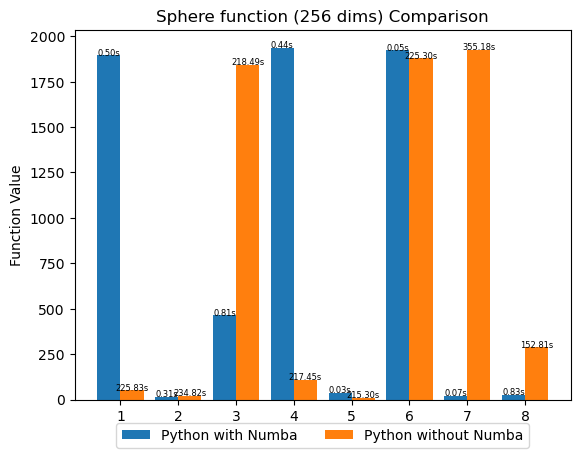

In [63]:
bounds = np.array([[-5, 5]] * 256)
print(f"dimensions number: {len(bounds)}")
print(f"population size: {50}")
print(f"generations number: {10000}")
best_values_numba, time_numba = find_best_values(a_lot_dimensions, bounds, 256, 50, 10000, 0.8, 0.9, "Sphere function (256 dims) with Numba")
best_values_nonumba, time_nonumba = find_best_values_(a_lot_dimensions_, bounds, 256, 50, 10000, 0.8, 0.9, "Sphere function (256 dims) without Numba")
draw_comparison_graphic(best_values_numba, best_values_nonumba, TESTS_AMOUNT - 2, "Sphere function (256 dims)", time_numba, time_nonumba)